# <p style="background-color:#2173D3;font-family:newtimeroman;color:#F5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Marketing Insights For E-Commerce Company</p>


### Objective 
- to get marketing insights from the data to define marketing strategies going forward. 
- Also, to build an analytical dashboard to monitor various KPI's & business metrics.

## Available Data:
Transaction data has been provided for the period of 1st Jan 2019 to 31st Dec 2019. The below data sets have been provided.
> __Online_Sales.csv__: This file contains actual orders data (point of Sales data) at transaction level with
below variables.
>- CustomerID: Customer unique ID
>- Transaction_ID: Transaction Unique ID
>- Transaction_Date: Date of Transaction
>- Product_SKU: SKU ID – Unique Id for product
>- Product_Description: Product Description
>- Product_Cateogry: Product Category
>- Quantity: Number of items ordered
>- Avg_Price: Price per one quantity
>- Delivery_Charges: Charges for delivery
>- Coupon_Status: Any discount coupon applied

> __Customers_Data.csv__: This file contains customer’s demographics.
>- CustomerID: Customer Unique ID
>- Gender: Gender of customer
>- Location: Location of Customer
>- Tenure_Months: Tenure in Months

> __Discount_Coupon.csv__: Discount coupons have been given for different categories in different
months
>- Month: Discount coupon applied in that month
>- Product_Category: Product category
>- Coupon_Code: Coupon Code for given Category and given month
>- Discount_pct: Discount Percentage for given coupon

> __Marketing_Spend.csv__: Marketing spend on both offline & online channels on day wise.
Date: Date
>- Offline_Spend: Marketing spend on offline channels like TV, Radio, NewsPapers, Hordings etc…
>- Online_Spend: Marketing spend on online channels like Google keywords, facebook etc..

> __Tax_Amount.csv__: GST Details for given category
>- Product_Category: Product Category
>- GST: Percentage of GST

## Importing required libraries

In [211]:
# To help with reading and manipulating data
import numpy as np
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
%matplotlib inline


# To help with model building
from sklearn.model_selection import train_test_split

# Classification Models
#"""________________________________________________________
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
#________________________________________________________"""

# To get different metric scores, and split data # To be used for evaluating the model
from sklearn import metrics
'''from sklearn.model_selection import StratifiedKFold'''
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,classification_report,
    roc_auc_score,
    make_scorer, mean_squared_error, mean_squared_log_error
    )


# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder
    )
from sklearn.compose import ColumnTransformer

# To be used for tuning the model 
from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV, 
    cross_val_score, 
    KFold
    )

# To be used to reduce dimensionality
from sklearn.decomposition import PCA

# To be used for Market basket Analysis/ Association Rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# To be used for creating pipelines and personalizing them
'''
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin
from sklearn.pipeline import make_pipeline
'''

# To oversample and undersample data
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [212]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [213]:
import datetime

---

## User Defined Fucntions used:

---

## Read the data sets:

In [214]:
cust = pd.read_excel('/Users/shivalingesh/Jupyter Notebook/ALabs/ML/Casestudies/Marketing-Insights Case study/Datasets/CustomersData.xlsx')
disc = pd.read_csv('/Users/shivalingesh/Jupyter Notebook/ALabs/ML/Casestudies/Marketing-Insights Case study/Datasets/Discount_Coupon.csv')
marketing = pd.read_csv('/Users/shivalingesh/Jupyter Notebook/ALabs/ML/Casestudies/Marketing-Insights Case study/Datasets/Marketing_Spend.csv')
sales = pd.read_csv('/Users/shivalingesh/Jupyter Notebook/ALabs/ML/Casestudies/Marketing-Insights Case study/Datasets/Online_Sales.csv')
tax = pd.read_excel('/Users/shivalingesh/Jupyter Notebook/ALabs/ML/Casestudies/Marketing-Insights Case study/Datasets/Tax_amount.xlsx')

---

## Data Audit, Cleaning & Preprocesing:

In [215]:
print(f'Dataset - Customer_Data has {cust.shape[0]} rows and {cust.shape[1]} columns')
print(f'Dataset - Discount_Coupon has {disc.shape[0]} rows and {disc.shape[1]} columns')
print(f'Dataset - Marketing_Spand has {marketing.shape[0]} rows and {marketing.shape[1]} columns')
print(f'Dataset - Online_Sales has {sales.shape[0]} rows and {sales.shape[1]} columns')
print(f'Dataset - Tax_amount has {tax.shape[0]} rows and {tax.shape[1]} columns')

Dataset - Customer_Data has 1468 rows and 4 columns
Dataset - Discount_Coupon has 204 rows and 4 columns
Dataset - Marketing_Spand has 365 rows and 3 columns
Dataset - Online_Sales has 52924 rows and 10 columns
Dataset - Tax_amount has 20 rows and 2 columns


In [216]:
cust.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months'], dtype='object')

In [217]:
cust.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [218]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [219]:
disc.columns

Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [220]:
disc.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [221]:
disc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [222]:
marketing.columns

Index(['Date', 'Offline_Spend', 'Online_Spend'], dtype='object')

In [223]:
marketing.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [224]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [225]:
sales.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')

In [226]:
sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [227]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


In [228]:
tax.columns

Index(['Product_Category', 'GST'], dtype='object')

In [229]:
tax.head()

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [230]:
tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


Observations:
- there are no null values in any table
- Column name `'Product_Category '` in __disc__ has extra space<br>

<u>Data type changes</u>:
- __`CustomerID`__ in `cust` is in __int64__; need to be converted to __object__
- __`Date`__ in `marketing` is in __object__; need to be converted to __datetime__
- __`CustomerID`__ in `sales` is in __int64__; need to be converted to __object__
- __`Transaction_ID`__ in `sales` is in __int64__; need to be converted to __object__
- __`Transaction_Date`__ in `sales` is in __int64__; need to be converted to __datetime__

In [231]:
# renaming the column name
disc.rename(columns={'Product_Category ':'Product_Category'}, inplace=True)

# changing the data types:
cust.CustomerID = cust.CustomerID.astype('object')
sales.CustomerID = sales.CustomerID.astype('object')
sales.Transaction_ID = sales.Transaction_ID.astype('object')

# changing the datatype to datetime
marketing.Date = pd.to_datetime(marketing['Date'], format='%m/%d/%Y')
sales.Transaction_Date = pd.to_datetime(sales.Transaction_Date, format='%Y%m%d')

In [232]:
print(f'Marketing Spend is spread between {marketing.Date.min().date()} to {marketing.Date.max().date()}')
print(f'Online Sales is spread between {sales.Transaction_Date.min().date()} to {sales.Transaction_Date.max().date()}')

Marketing Spend is spread between 2019-01-01 to 2019-12-31
Online Sales is spread between 2019-01-01 to 2019-12-31


---

In [233]:
# creating the month column in 'sales' data to ease merging with 'disc' data
sales['tran_month'] = sales.Transaction_Date.dt.strftime('%b')

---

In [234]:
# Found some issues with merging the dataset, therefore inspecting:

# Checking the spread of Product_Category by transaction month in Online Sales table
pd.DataFrame(sales.groupby(['tran_month','Product_Category'])['Product_Category'].count()).unstack(level=0)

Product_Category                                          \
tran_month                        Apr     Aug     Dec     Feb     Jan     Jul   
Product_Category                                                                
Accessories                       4.0     8.0    56.0     NaN     1.0     6.0   
Android                           2.0     7.0     NaN     1.0     4.0     8.0   
Apparel                        1582.0  2820.0  1337.0   905.0   960.0  2182.0   
Backpacks                        11.0    11.0     NaN     6.0     3.0     8.0   
Bags                            145.0   201.0    89.0   139.0   155.0   216.0   
Bottles                          20.0    38.0     NaN    19.0    16.0    40.0   
Drinkware                       267.0   462.0   160.0   284.0   295.0   298.0   
Fun                              18.0    21.0     NaN    14.0    11.0    35.0   
Gift Cards                        7.0    10.0    10.0     6.0     4.0    10.0   
Google                           10.0     6.0     NaN    15.0    21.0    12.0   
Headgear                         72.0   112.0    49.0    66.0    54.0   119.0   
Housewares                       10.0    33.0     NaN     5.0    10.0    22.0   
Lifestyle                       252.0   429.0    71.0   199.0   200.0   383.0   
More Bags                        13.0     NaN     NaN     4.0     5.0     NaN   
Nest                              NaN    86.0   712.0     NaN     NaN     NaN   
Nest-Canada                      27.0    24.0    26.0    22.0    39.0    27.0   
Nest-USA                        996.0  1088.0  1534.0  1055.0  1563.0  1161.0   
Notebooks & Journals             73.0   191.0     9.0    51.0    54.0   150.0   
Office                          606.0   541.0   385.0   468.0   607.0   549.0   
Waze                             35.0    62.0    64.0    25.0    61.0    25.0   

                                                                      
tran_month               Jun     Mar     May     Nov     Oct     Sep  
Product_Category                                                      
Accessories              7.0     1.0     6.0    83.0    49.0    13.0  
Android                  9.0     7.0     5.0     NaN     NaN     NaN  
Apparel               1646.0  1437.0  1876.0   772.0  1114.0  1495.0  
Backpacks                4.0     7.0    21.0     4.0     8.0     6.0  
Bags                   148.0   195.0   163.0   115.0   138.0   178.0  
Bottles                 22.0    24.0    26.0     NaN    22.0    41.0  
Drinkware              239.0   401.0   287.0   164.0   305.0   321.0  
Fun                     17.0    17.0    15.0     NaN     3.0     9.0  
Gift Cards              10.0     6.0    25.0     NaN    68.0     3.0  
Google                  13.0    17.0    11.0     NaN     NaN     NaN  
Headgear                64.0    66.0    65.0    24.0    22.0    58.0  
Housewares              10.0    17.0    12.0     NaN     NaN     3.0  
Lifestyle              270.0   245.0   262.0   124.0   317.0   340.0  
More Bags                NaN    15.0     9.0     NaN     NaN     NaN  
Nest                     NaN     NaN     NaN   654.0   455.0   291.0  
Nest-Canada             41.0    28.0    21.0    24.0    23.0    15.0  
Nest-USA              1072.0  1099.0   970.0  1427.0  1106.0   942.0  
Notebooks & Journals    53.0    57.0    57.0     NaN     3.0    51.0  
Office                 533.0   658.0   685.0   508.0   488.0   485.0  
Waze                    35.0    49.0    56.0    62.0    43.0    37.0

> all product categories are not sold in all months, there are some months where some of the prodcut categoris are not sold

In [235]:
# checking the spread of Product_Category by Month in Discount Coupon table
pd.DataFrame(disc.groupby(['Month','Product_Category'])['Product_Category'].count()).unstack(level=0)

Product_Category                                          \
Month                             Apr Aug Dec Feb Jan Jul Jun Mar May Nov Oct   
Product_Category                                                                
Accessories                         1   1   1   1   1   1   1   1   1   1   1   
Android                             1   1   1   1   1   1   1   1   1   1   1   
Apparel                             1   1   1   1   1   1   1   1   1   1   1   
Bags                                1   1   1   1   1   1   1   1   1   1   1   
Bottles                             1   1   1   1   1   1   1   1   1   1   1   
Drinkware                           1   1   1   1   1   1   1   1   1   1   1   
Gift Cards                          1   1   1   1   1   1   1   1   1   1   1   
Headgear                            1   1   1   1   1   1   1   1   1   1   1   
Housewares                          1   1   1   1   1   1   1   1   1   1   1   
Lifestyle                           1   1   1   1   1   1   1   1   1   1   1   
Nest                                1   1   1   1   1   1   1   1   1   1   1   
Nest-Canada                         1   1   1   1   1   1   1   1   1   1   1   
Nest-USA                            1   1   1   1   1   1   1   1   1   1   1   
Notebooks                           1   1   1   1   1   1   1   1   1   1   1   
Notebooks & Journals                1   1   1   1   1   1   1   1   1   1   1   
Office                              1   1   1   1   1   1   1   1   1   1   1   
Waze                                1   1   1   1   1   1   1   1   1   1   1   

                          
Month                Sep  
Product_Category          
Accessories            1  
Android                1  
Apparel                1  
Bags                   1  
Bottles                1  
Drinkware              1  
Gift Cards             1  
Headgear               1  
Housewares             1  
Lifestyle              1  
Nest                   1  
Nest-Canada            1  
Nest-USA               1  
Notebooks              1  
Notebooks & Journals   1  
Office                 1  
Waze                   1

> product category in __disc__ data has been mis_classified as `Notebooks` which should be `Notebooks & Journals` as there are no Notebooks category in Sales

> I guess product categories - `Backpacks`, `Fun`, `Google`, `More Bags` are not provided discount. 

In [236]:
disc[disc['Product_Category'] == 'Notebooks & Journals']

,Month,Product_Category,Coupon_Code,Discount_pct
45,Jan,Notebooks & Journals,NJ10,10
46,Feb,Notebooks & Journals,NJ20,20
47,Mar,Notebooks & Journals,NJ30,30
96,Apr,Notebooks & Journals,NJ10,10
97,May,Notebooks & Journals,NJ20,20
98,Jun,Notebooks & Journals,NJ30,30
147,Jul,Notebooks & Journals,NJ10,10
148,Aug,Notebooks & Journals,NJ20,20
149,Sep,Notebooks & Journals,NJ30,30
198,Oct,Notebooks & Journals,NJ10,10


In [237]:
disc[disc['Product_Category'] == 'Notebooks']

,Month,Product_Category,Coupon_Code,Discount_pct
18,Jan,Notebooks,NOTES10,10
19,Feb,Notebooks,NOTES20,20
20,Mar,Notebooks,NOTES30,30
69,Apr,Notebooks,NOTES10,10
70,May,Notebooks,NOTES20,20
71,Jun,Notebooks,NOTES30,30
120,Jul,Notebooks,NOTES10,10
121,Aug,Notebooks,NOTES20,20
122,Sep,Notebooks,NOTES30,30
171,Oct,Notebooks,NOTES10,10


> Both the `Notebooks & Journals` and `Notebooks` looks identical.
> - it seems like Discount_Coupon (disc) table has dublicated Product category for Notebooks & Journals in the form of Notebooks. 
>> So, I am droping the rows containing 'Notebooks' in 'disc' table

In [238]:
# droping the rows in 'disc' with Notebooks as Product_Category
disc = disc[~(disc['Product_Category'] == 'Notebooks')]

---

In [239]:
sales[sales.Product_Category == 'Bags'].groupby(['Product_Description'])['Product_Description'].count()

Product_Description
Collapsible Shopping Bag           204
Electronics Accessory Pouch         85
Google Alpine Style Backpack       157
Google Canvas Tote Natural/Navy    213
Google Laptop Backpack              59
Google Lunch Bag                    96
Google Rolltop Backpack Blue        27
Google Rucksack                    181
Google Slim Utility Travel Bag      51
Google Tote Bag                     72
Google Zipper-front Sports Bag      41
Large Zipper Top Tote Bag           23
Reusable Shopping Bag               64
Softsided Travel Pouch Set          18
Sport Bag                          408
Suitcase Organizer Cubes            58
Waterproof Backpack                125
Name: Product_Description, dtype: int64

In [240]:
sales[sales.Product_Category == 'Backpacks'].groupby(['Product_Description'])['Product_Description'].count()

Product_Description
25L Classic Rucksack           70
Google Laptop Tech Backpack    19
Name: Product_Description, dtype: int64

In [241]:
sales[sales.Product_Category == 'More Bags'].groupby(['Product_Description'])['Product_Description'].count()

Product_Description
Google Collapsible Duffel Black    29
Google Collapsible Duffel Blue     17
Name: Product_Description, dtype: int64

> I assume 
<b>25L Classic Rucksack</b> &  __Google Laptop Tech Backpack__ are being mis_classified as __`Backpacks`__<br>
> also __Google Collapsible Duffel Black__ and __Google Collapsible Duffel Blue__ are being mis_classified as __`More Bags`__<br>

> The `Coupon_status` tells that coupons on these products are being clicked & used, but <br>
> disc table don't contain any category named Backpacks or More Bags<br>
> So, i am __changing the values with 'Backpacks' & 'More Bags' to 'Bags'__ in __sales table__.

In [242]:
sales[sales.Product_Category == 'Google'].groupby(['Product_Description'])['Product_Description'].count()

Product_Description
Google 17 oz Double Wall Stainless Steel Insulated Bottle    64
Google 25 oz Clear Stainless Steel Bottle                    41
Name: Product_Description, dtype: int64

In [243]:
sales[sales.Product_Category == 'Bottles'].groupby(['Product_Description'])['Product_Description'].count()

Product_Description
22 oz Android Bottle            139
22 oz YouTube Bottle Infuser    129
Name: Product_Description, dtype: int64

In [244]:
sales[sales.Product_Category == 'Drinkware'].groupby(['Product_Description'])['Product_Description'].count()

Product_Description
20 oz Stainless Steel Insulated Tumbler             113
23 oz Wide Mouth Sport Bottle                        85
24 oz YouTube Sergeant Stripe Bottle                 94
26 oz Double Wall Insulated Bottle                  408
Android 17oz Stainless Steel Sport Bottle            86
Android 24 oz Contigo Bottle                         46
Android 25 oz Green Apple Stainless Steel Bottle     12
Android Glass Water Bottle with Black Sleeve         22
Android Rise 14 oz Mug                              250
Bottle Opener Clip                                   61
Engraved Ceramic Google Mug                         128
Foam Can and Bottle Cooler                          292
Google 17oz Stainless Steel Sport Bottle            250
Google 22 oz Water Bottle                           902
Google 25 oz Blue Stainless Steel Bottle             47
Google 25 oz Red Stainless Steel Bottle              91
Google 40 oz Insulated Monster Bottle                12
Google Accent Insulated Stai

> I assume 
<b>__Google 17 oz Double Wall Stainless Steel Insulated Bottle__
</b> &  __Google 25 oz Clear Stainless Steel Bottle__ are being mis_classified as __`Google`__

> - Google 17oz Stainless Steel Sport Bottle, Google 22 oz Water Bottle, Google 25 oz Blue Stainless Steel Bottle, etc... in __`Drinkware`__ category seems related to Discription of products classified as 'Google'
> - So, i am __changing the categories of 'Google' to 'Drinkware'__ in __sales table__.

In [245]:
sales[sales.Product_Category == 'Fun'].groupby(['Product_Description'])['Product_Description'].count()

Product_Description
Android Luggage Tag     33
Google Luggage Tag     109
YouTube Luggage Tag     18
Name: Product_Description, dtype: int64

> Coupon status of 'Fun' category is telling that there was coupon being Used / Clicked.<br>
> But the disc table doesn't contain any 'Fun' category <br>
> I assume __Android Luggage Tag__, __Google Luggage Tag__, __YouTube Luggage Tag__ might be having typo of `Bag - Tag`<br>
    >- and caused mis_classification, So, I am keeping these products in __`Bags`__ category.

In [246]:
# Replace Product categories with appropriate classifications
sales['Product_Category'] = sales['Product_Category'].replace('Backpacks', 'Bags')
sales['Product_Category'] = sales['Product_Category'].replace('More Bags', 'Bags')
sales['Product_Category'] = sales['Product_Category'].replace('Google', 'Drinkware')
sales['Product_Category'] = sales['Product_Category'].replace('Fun', 'Bags')

---

In [247]:
sales.shape

(52924, 11)

---

Let me merge all the 5 data sets to arrive at customer 360 dataset.
- I will first merge Online Sales data (sales) with Customers_Data (cust) based on CustomerID
- then with Discount_Coupon data (disc) based on month & the product categories
- then with Tax_Amount data (tax) based on product category
- lastly with Marketing_Spend data (marketing) based on transaction date

In [248]:
cust_360 = pd.merge(
    sales, cust, 
    on = 'CustomerID',
                   how='left'
                   )

In [249]:
cust_360.shape

(52924, 14)

In [250]:
cust_360 = cust_360.merge(disc, 
               left_on=['tran_month','Product_Category'],
              right_on=['Month','Product_Category'],
              how='left'
                         )

In [251]:
cust_360.shape

(52924, 17)

In [252]:
cust_360 = cust_360.merge(tax, on='Product_Category', how='left')

In [253]:
cust_360.shape

(52924, 18)

In [254]:
"""
cust_360 = cust_360.merge(marketing,
               left_on='Transaction_Date',
              right_on='Date', how='left')
"""

"\ncust_360 = cust_360.merge(marketing,\n               left_on='Transaction_Date',\n              right_on='Date', how='left')\n"

In [255]:
cust_360.shape

(52924, 18)

---

In [256]:
cust_360.isna().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
tran_month             0
Gender                 0
Location               0
Tenure_Months          0
Month                  0
Coupon_Code            0
Discount_pct           0
GST                    0
dtype: int64

In [257]:
cust_360[['tran_month','Month']].sample(30)

,tran_month,Month
8001,Mar,Mar
46960,Nov,Nov
31760,Aug,Aug
3941,Jan,Jan
19724,May,May
52427,Dec,Dec
31629,Aug,Aug
19337,May,May
18982,May,May
31392,Aug,Aug


> Since we have `tran_month` column - I am droping the 'Month' column<br>
> and Replace NaN values in `Discount_pct` with '0'<br>
> and Replace NaN values in `Coupon_Code` with 'No_code'

In [258]:
# Drop 'Month' column
cust_360.drop(columns='Month', inplace=True)

# Substitute missing values with 0 in 'Discount_pct' column
#cust_360['Discount_pct'].fillna(0, inplace=True)

# Replace missing values with 'No_Code' in 'Coupon_Code' column
#cust_360['Coupon_Code'].fillna('No_Code', inplace=True)

In [259]:
cust_360.isna().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
tran_month             0
Gender                 0
Location               0
Tenure_Months          0
Coupon_Code            0
Discount_pct           0
GST                    0
dtype: int64

In [260]:
cust_360[cust_360.Discount_pct < 1].sum()

CustomerID             0.0
Transaction_ID         0.0
Product_SKU            0.0
Product_Description    0.0
Product_Category       0.0
Quantity               0.0
Avg_Price              0.0
Delivery_Charges       0.0
Coupon_Status          0.0
tran_month             0.0
Gender                 0.0
Location               0.0
Tenure_Months          0.0
Coupon_Code            0.0
Discount_pct           0.0
GST                    0.0
dtype: float64

In [261]:
'''cust_360[['Transaction_Date','Date']].sample(30)'''

"cust_360[['Transaction_Date','Date']].sample(30)"

> Since we have `Transaction_Date` column - I am droping the 'Date' column

In [262]:
# Drop 'Date' column
#cust_360.drop(columns='Date', inplace=True)

In [263]:
cust_360.shape

(52924, 17)

---

___

In [264]:
cust_360.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  object        
 1   Transaction_ID       52924 non-null  object        
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  tran_month           52924 non-null  object        
 11  Gender               52924 non-null  object        
 12  Location             52924 non-null  object        
 13  Tenure_Months        52924 non-

In [265]:
cust_360.Coupon_Status.value_counts()

Clicked     26926
Used        17904
Not Used     8094
Name: Coupon_Status, dtype: int64

## Calculate Invoice amount for each transaction and item level

>  <div class="alert alert-block alert-success"> Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges </div>

In [266]:
cust_360['Invoice_value'] = np.where(
    cust_360.Coupon_Status == 'Used', 
    # transaction used the discount coupon:
    ((cust_360.Quantity * cust_360.Avg_Price) * (1 - cust_360.Discount_pct/100) * (1 + cust_360.GST)) + cust_360.Delivery_Charges,
    # transaction don't used the discount coupon:
    ((cust_360.Quantity * cust_360.Avg_Price) * (1 + cust_360.GST)) + cust_360.Delivery_Charges
)

In [267]:
cust_360.sample(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,tran_month,Gender,Location,Tenure_Months,Coupon_Code,Discount_pct,GST,Invoice_value
41796,14606,40399,2019-10-11,GGOEGGCX056199,Gift Card- $100.00,Gift Cards,1,100.00,0.00,Clicked,Oct,F,Chicago,33,GC10,10,0.05,105.0000
31354,14800,34962,2019-08-08,GGOEGAEJ031316,Google Tri-blend Hoodie Grey,Apparel,3,31.99,12.48,Clicked,Aug,M,Chicago,21,SALE20,20,0.18,125.7246
17828,14796,27930,2019-05-13,GGOEGOAR021999,Color Changing Grip Pen,Office,30,1.50,6.00,Not Used,May,F,Chicago,3,OFF20,20,0.10,55.5000
17271,15998,27633,2019-05-09,GGOEGBJC014399,Google Tote Bag,Bags,15,7.99,15.72,Used,May,F,New York,16,AIO20,20,0.18,128.8584
49133,12836,45798,2019-12-05,GGOEGGOA017399,Maze Pen,Office,5,1.01,6.00,Not Used,Dec,M,Chicago,6,OFF30,30,0.10,11.5550


> we need to __drop__ the columns that influence the Invoice_value (__Quantity, Avg_price, Discount, GST, Delivery charges__)<br>
> otherwise there will be multi-colinearity problem in model building

---

---

# Perform Detailed exploratory analysis

## Understanding how many customers acquired every month 
## Understand the retention of customers on month on month basis

In [268]:
# creating the column for Year-Month
cust_360['Y_m_tran_dt'] = cust_360.Transaction_Date.dt.to_period('M')

In [269]:
cust_360.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'tran_month', 'Gender', 'Location',
       'Tenure_Months', 'Coupon_Code', 'Discount_pct', 'GST', 'Invoice_value',
       'Y_m_tran_dt'],
      dtype='object')

> __Need to figure out the customers who made purchase on the current month & are existing customers of previous month__ (returning customers)
- 

In [270]:
# Get unique months
months = cust_360['Y_m_tran_dt'].unique()

# Initialize empty list for results
mom_retention_data = []

# Loop over months starting from the second month
for ym in range(1, len(months)):
    # Get data for last month
    current_month = cust_360[cust_360['Y_m_tran_dt'] == months[ym]]

    # Get data for current month
    last_month  = cust_360[cust_360['Y_m_tran_dt'] == months[ym-1]]

    # Calculate retained customers
    retained = last_month[last_month.CustomerID.isin(current_month.CustomerID)]
    
    #new customers added:
    l_m_c = set(last_month.CustomerID)
    c_m_c = set(current_month.CustomerID)
    added = len(c_m_c.difference(l_m_c))

    # Calculate retention metrics
    unique_customers_last_month = last_month['CustomerID'].nunique()
    unique_customers_current_month = current_month['CustomerID'].nunique()
    
    retention_count = retained.CustomerID. nunique ()
    retention_percentage = str(round((retention_count / unique_customers_last_month)*100,2))+'%' if unique_customers_last_month > 0 else 0

    # Append results to list
    mom_retention_data.append({
      'Year-Month': months[ym],
      'Unique Customers of current month': unique_customers_current_month,
        'Unique Customers of previous month': unique_customers_last_month ,
        'New customers':added,
      'Retention of the month': retention_count,
      'Retention_rate': retention_percentage
    })


In [271]:
cohorts = pd.DataFrame(mom_retention_data)

In [272]:
cohorts

,Year-Month,Unique Customers of current month,Unique Customers of previous month,New customers,Retention of the month,Retention_rate
0,2019-02,109,215,96,13,6.05%
1,2019-03,208,109,197,11,10.09%
2,2019-04,224,208,200,24,11.54%
3,2019-05,200,224,175,25,11.16%
4,2019-06,259,200,222,37,18.5%
5,2019-07,236,259,178,58,22.39%
6,2019-08,300,236,235,65,27.54%
7,2019-09,193,300,149,44,14.67%
8,2019-10,210,193,181,29,15.03%
9,2019-11,188,210,157,31,14.76%


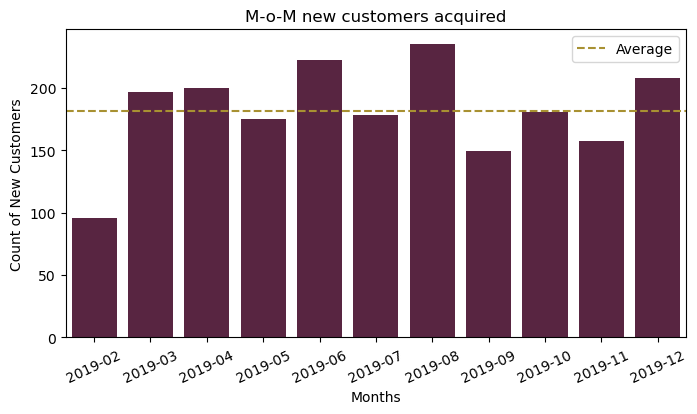

In [273]:
plt.figure(figsize=(8,4))
sns.barplot(data=cohorts, x='Year-Month', y='New customers', color='#611c42' )
plt.xticks(rotation=25)
plt.ylabel('Count of New Customers')
plt.xlabel('Months')
plt.title('M-o-M new customers acquired')
 
# Calculate the average & Adding average line 
average_value = cohorts[ 'New customers' ]. mean ()
plt.axhline (y=average_value, color='#a89132', linestyle='--', label='Average' )    

# Adding annotations
#for index, row in cohorts.iterrows():
    #plt.text(cohorts['Year-Month'], cohorts[ 'New customers' ], cohorts[ 'New customers' ], color='grey', ha="center", va='top', rotation=90)

plt.legend ( )
plt.show()

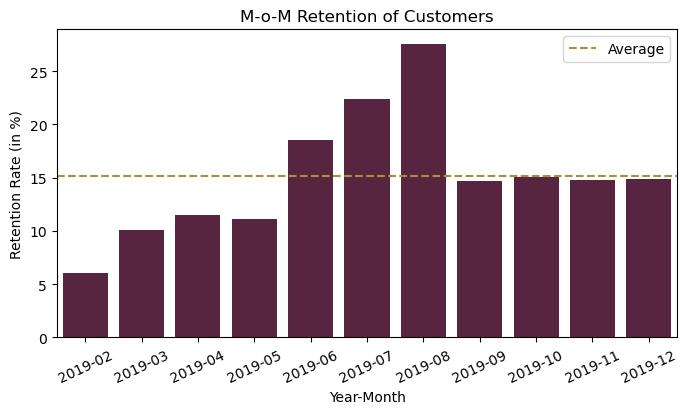

In [274]:
# taking the str objects into float
Retention_Percentage = cohorts['Retention_rate'].str[:-1].astype(float)

plt.figure(figsize=(8,4))
sns.barplot(data=cohorts, x='Year-Month', y=Retention_Percentage, color='#611c42' )
plt.xticks(rotation=25)
plt.ylabel('Retention Rate (in %)')
plt.title('M-o-M Retention of Customers')

# Calculate the average & Adding average line
average_value = Retention_Percentage. mean ()
plt.axhline (y=average_value, color='#a89132', linestyle='--', label='Average' )   

#for i,j in zip(cohorts['Year-Month'],cohorts.Retention_Percentage):
  #  plt.text(i,j,j,ha='center',va='bottom',rotation=45)

plt.legend ( )
plt.show()

> Customer acquisition seems to be fairly consistent throughout the year, with an average of around 182 new customers per month. August 2019 saw the highest number of new customers acquired (235).

> Customer retention was trending upwards from Feb to August, after that it stagnated around the level of average monthly retention rate of 15.15%. However, August 2019 again stands out as the month with the highest customer retention rate (27.54%).

## How the revenues from existing/new customers on month on month basis

In [275]:
# Get unique months
months = cust_360['Y_m_tran_dt'].unique()

# Initialize empty list for results
mom_revenue_data = []

# Loop over months starting from the second month
for ym in range(1, len(months)):
    
    current_month = cust_360[cust_360['Y_m_tran_dt'] == months[ym]]
    last_month  = cust_360[cust_360['Y_m_tran_dt'] == months[ym-1]]
    
    #new & existing customers:
    l_m_c = set(last_month.CustomerID)
    c_m_c = set(current_month.CustomerID)
    new = c_m_c.difference(l_m_c)
    existing = c_m_c.intersection(l_m_c)
    
    # calculating the current month revenue of new customers
    new_cust_revenue = current_month[current_month.CustomerID.isin(new)].groupby(['Y_m_tran_dt'])['Invoice_value'].sum()
    
    # calculating the current month revenue of new customers
    existing_cust_revenue = current_month[current_month.CustomerID.isin(existing)].groupby(['Y_m_tran_dt'])['Invoice_value'].sum()

    
    # Append results to list
    mom_revenue_data.append({
      'year_month': months[ym],
      'new_customers': len(new),
        'revenue_from_new_c': new_cust_revenue.iloc[0] if len(new_cust_revenue) > 0 else 0,
        'existing_customers': len(existing) ,
      'revenue_from_existing_c': existing_cust_revenue.iloc[0] if len(existing_cust_revenue) > 0 else 0,
    })

In [276]:
mom_revenue_data = pd.DataFrame(mom_revenue_data)
mom_revenue_data

,year_month,new_customers,revenue_from_new_c,existing_customers,revenue_from_existing_c
0,2019-02,96,328657.42400,13,46530.99002
1,2019-03,197,370302.00343,11,44272.32137
2,2019-04,200,367982.97626,24,109462.10454
3,2019-05,175,324762.27782,25,40837.54510
4,2019-06,222,309301.87246,37,51670.38511
5,2019-07,178,348588.35550,58,103354.18592
6,2019-08,235,369582.89544,65,106205.09654
7,2019-09,149,335102.00587,44,61412.50357
8,2019-10,181,422836.57261,29,58036.60516
9,2019-11,157,505123.34902,31,42674.69640


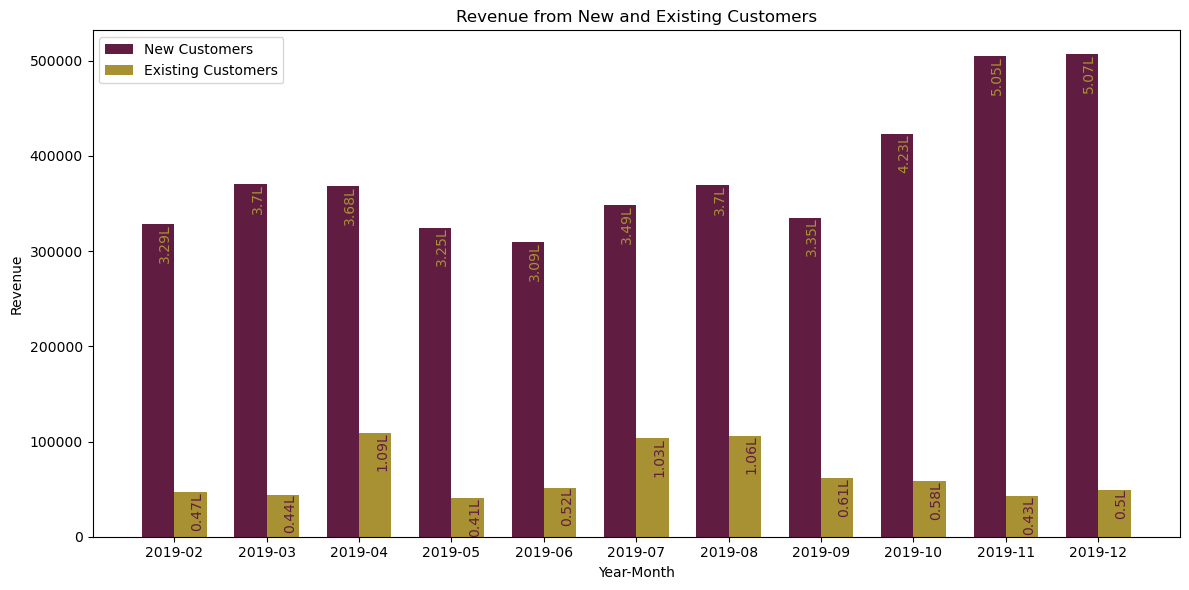

In [277]:
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.35

# Set the positions for the bars
positions_new = np.arange(len(mom_revenue_data))  # left edges of the bars will be placed on these positions on the x-axis
positions_existing = [x + bar_width for x in positions_new]  # adding bar width to positions_new, shifting the bar positions to the right

# Plot revenue from new customers
bars1 = plt.bar(positions_new, mom_revenue_data['revenue_from_new_c'], width=bar_width, color='#611c42', label='New Customers')

# Plot revenue from existing customers
bars2 = plt.bar(positions_existing, mom_revenue_data['revenue_from_existing_c'], width=bar_width, color='#a89132', label='Existing Customers',)

# Add labels to each bar
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    
    plt.text(bar1.get_x() + bar1.get_width() / 2, height1, f'{round(height1/100000, 2)}L', ha='left', va='top', rotation=90, color='#a89132', fontsize=10)
    plt.text(bar2.get_x() + bar2.get_width() / 2, height2, f'{round(height2/100000, 2)}L', ha='left', va='top', rotation=90, color='#611c42', fontsize=10)

# Set the x-axis ticks and labels
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.title('Revenue from New and Existing Customers')
plt.xticks(ticks=positions_new + bar_width / 2, labels=mom_revenue_data['year_month']) # positons_new is left edge of bar; (bar_width / 2) will make sure xticks are placed at the center of each bar
plt.legend()

plt.tight_layout()
plt.show()


> Though the number of new customers M-o-M fluctuates between 96 to 235, Revenue from them have seen increase.
   > - From the chart it is clear that the revenue from new_customers had broke out the 3 to 3.7L range in October month and seen steady increase from there.
   
> The revenue from existing_customers are not showing clear trend. Exluding Apr, July & Aug it stays below 1,00,000
>- We should focus on existing_customers as our average retention rate is ~15%
>- Should give push to increase revenue from existing_customers and sustain it above 1L level. 1L seems to be an inflection point.

## How the discounts playing role in the revenues?

In [278]:
cust_360.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'tran_month', 'Gender', 'Location',
       'Tenure_Months', 'Coupon_Code', 'Discount_pct', 'GST', 'Invoice_value',
       'Y_m_tran_dt'],
      dtype='object')

In [279]:
disount_revenue=cust_360.groupby(['Coupon_Status'])['Invoice_value'].sum()

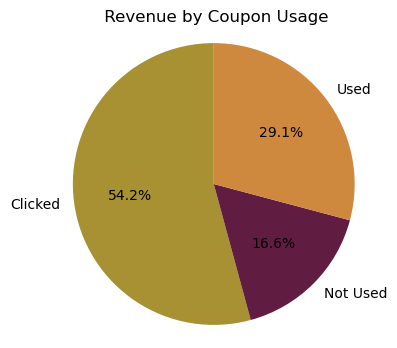

In [280]:
# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(disount_revenue, labels=disount_revenue.index, autopct='%1.1f%%', startangle=90, colors=['#a89132', '#611c42', '#cf893e'])
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title(' Revenue by Coupon Usage')

plt.show()

In [281]:
# Group by month and coupon status
coupon_totals = cust_360.groupby(['Y_m_tran_dt', 'Coupon_Status'])['Invoice_value'].sum().unstack()

# Calculate percentage contribution for each coupon status
coupon_totals_pct = coupon_totals.div(coupon_totals.sum(axis=1), axis=0) * 100

In [282]:
coupon_totals_pct = coupon_totals_pct[['Used','Clicked','Not Used']]

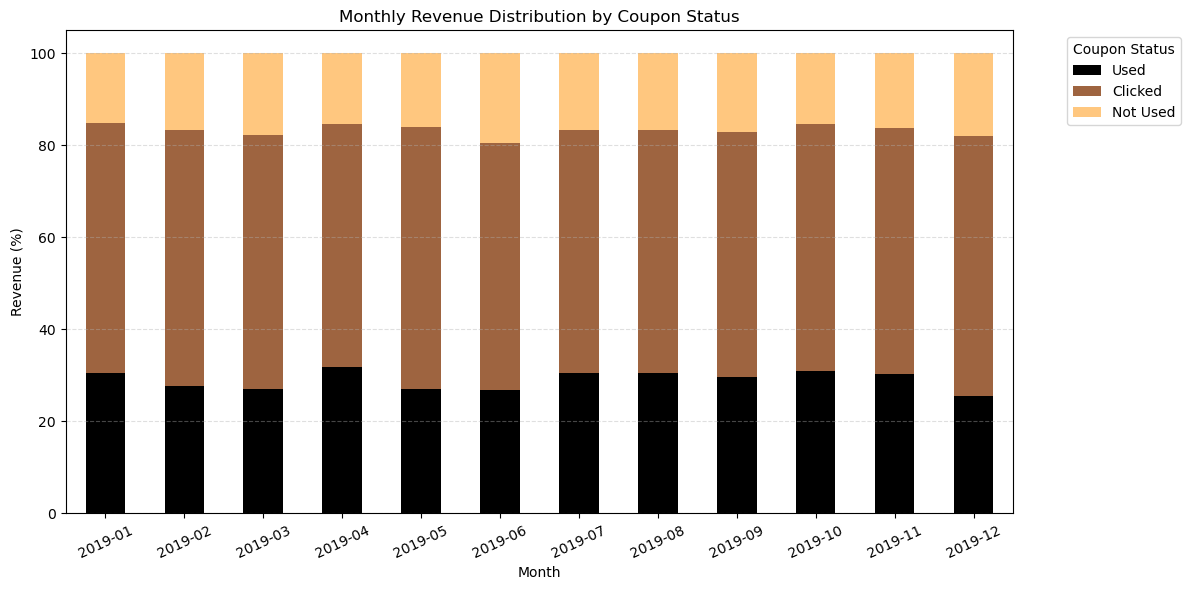

In [283]:
coupon_totals_pct.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='copper')
plt.xlabel('Month')
plt.ylabel('Revenue (%)')
plt.title('Monthly Revenue Distribution by Coupon Status')
plt.legend(title='Coupon Status', loc='upper left', bbox_to_anchor=(1.05, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=25)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# Display the plot
plt.show()

> Company is generating about 25-30% of its revenue from the transactions which used Discounts.
>- On an average 29% of the monthly revenue is coming from the transactions that used Disounts.
>- Discounts have generated almost uniform revenue

> Company need to 

## Analyse KPI’s like Revenue, number of orders, average order value, quantity, by category, by month, by week, by day etc…

- __Revenue__ by category, by month, by week, by day
- __No of orders__ by category, by month, by week, by day
- __avg order value__ by category, by month, by week, by day
- __Quantity__ by category, by month, by week, by day

In [284]:
cust_360['week_num']=cust_360.Transaction_Date.dt.weekday
cust_360['month_num']=cust_360.Transaction_Date.dt.month

month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
week_name = ['Mon', 'Tue','Wed','Thu','Fri','Sat','Sun']

In [285]:
#Revenue by category, by month, by week
revenue_by_cat = cust_360.groupby('Product_Category')['Invoice_value'].sum().reset_index()
revenue_by_month = cust_360.groupby('month_num')['Invoice_value'].sum().reset_index()
revenue_by_week = cust_360.groupby('week_num')['Invoice_value'].sum().reset_index()

#No of orders by category, by month, by week
order_count_by_cat = cust_360.groupby('Product_Category')['Transaction_Date'].count().reset_index()
order_count_by_month = cust_360.groupby('month_num')['Transaction_Date'].count().reset_index()
order_count_by_week = cust_360.groupby('week_num')['Transaction_Date'].count().reset_index()

#avg order value by category, by month, by week; [Average order value = total revenue / total number of transactions]
avg_ord_value_by_cat = cust_360.groupby('Product_Category').apply(lambda x: x['Invoice_value'].sum() / x['Transaction_ID'].nunique()).reset_index()
avg_ord_value_by_month = cust_360.groupby('month_num').apply(lambda x: x['Invoice_value'].sum() / x['Transaction_ID'].nunique()).reset_index()
avg_ord_value_by_week = cust_360.groupby('week_num').apply(lambda x: x['Invoice_value'].sum() / x['Transaction_ID'].nunique()).reset_index()

#Quantity by category, by month, by week, by day
quantity_by_cat = cust_360.groupby('Product_Category')['Quantity'].sum().reset_index()
quantity_by_month= cust_360.groupby('month_num')['Quantity'].sum().reset_index()
quantity_by_week= cust_360.groupby('week_num')['Quantity'].sum().reset_index()

In [286]:
def highlight_highest_value_bar(series, color='#cf893e'):
    """
    Highlights the bar with the highest value in the given subplot.
    
    data: pandas Series containing the values of the bars
    color: colour of the bar which is being highlighted
    """
    max_value_index = series.idxmax()
    bars = plt.gca().patches
    bars[max_value_index].set_facecolor(color)

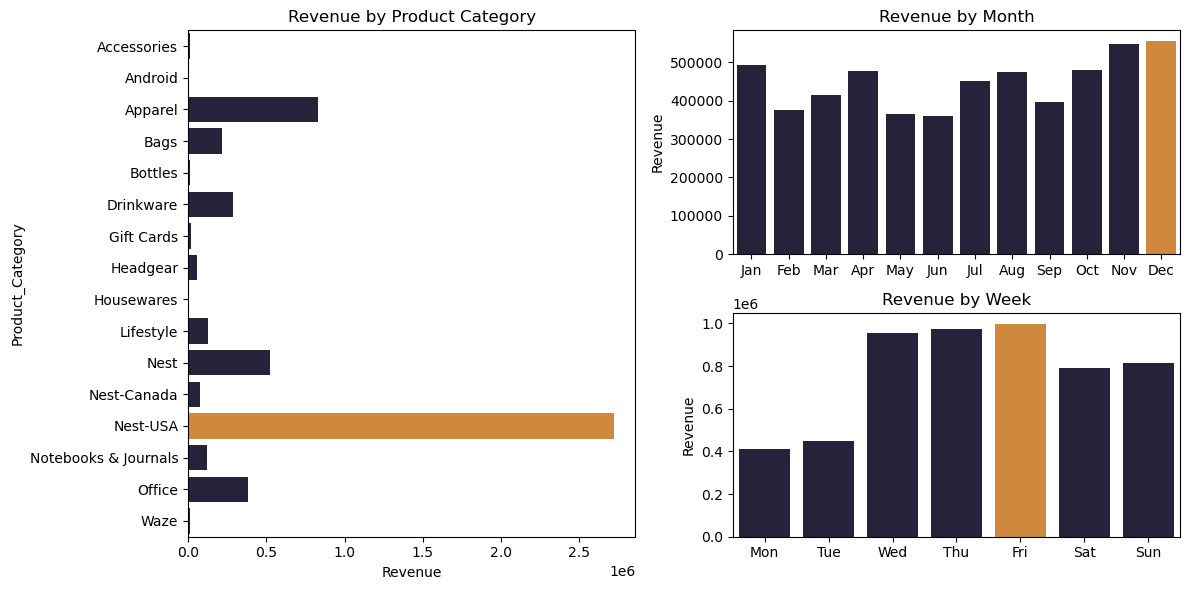

In [287]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.barplot(data=revenue_by_cat, y='Product_Category', x='Invoice_value', color='#251e3e')
plt.xlabel('Revenue')
plt.title('Revenue by Product Category')
plt.grid(False)
highlight_highest_value_bar(revenue_by_cat.Invoice_value)

plt.subplot(2,2,2)
sns.barplot(data=revenue_by_month, x=month_name, y='Invoice_value', color='#251e3e')
plt.ylabel('Revenue')
plt.title('Revenue by Month')
plt.grid(False)
highlight_highest_value_bar(revenue_by_month.Invoice_value)

plt.subplot(2,2,4)
sns.barplot(data=revenue_by_week, x=week_name, y='Invoice_value', color='#251e3e')
plt.ylabel('Revenue')
plt.title('Revenue by Week')
plt.grid(False)
highlight_highest_value_bar(revenue_by_week.Invoice_value)

plt.tight_layout()
plt.show()

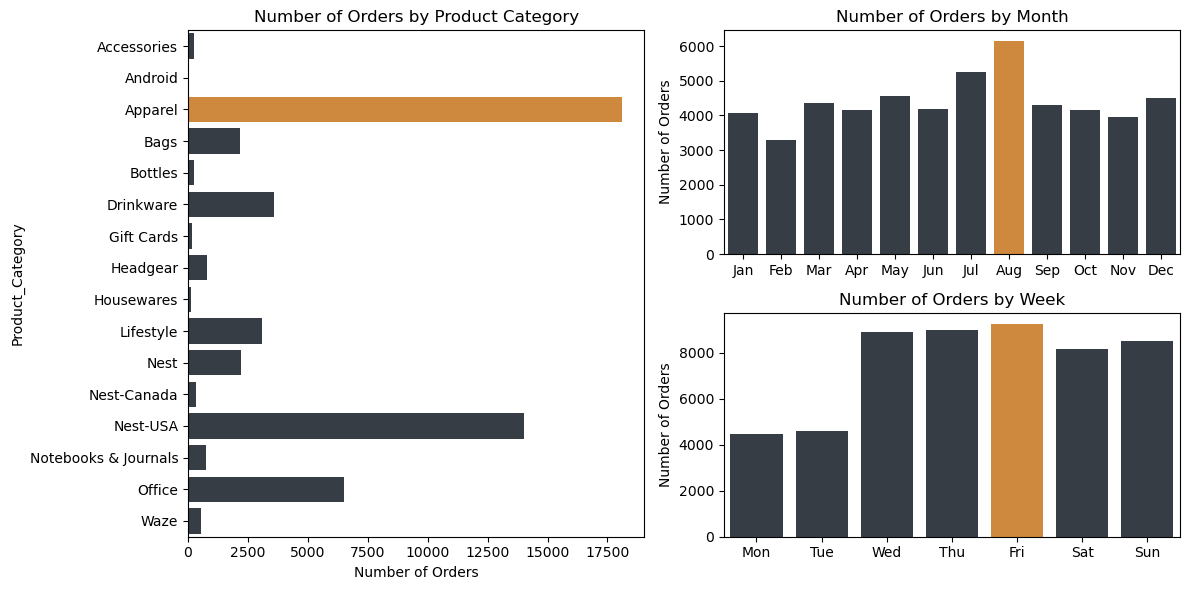

In [288]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.barplot(data=order_count_by_cat, y='Product_Category', x='Transaction_Date', color='#343d46')
plt.xlabel('Number of Orders')
plt.title('Number of Orders by Product Category')
plt.grid(False)
highlight_highest_value_bar(order_count_by_cat.Transaction_Date)

plt.subplot(2,2,2)
sns.barplot(data=order_count_by_month, x=month_name, y='Transaction_Date', color='#343d46')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Month')
plt.grid(False)
highlight_highest_value_bar(order_count_by_month.Transaction_Date)

plt.subplot(2,2,4)
sns.barplot(data=order_count_by_week, x=week_name, y='Transaction_Date', color='#343d46')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Week')
plt.grid(False)
highlight_highest_value_bar(order_count_by_week.Transaction_Date)

plt.tight_layout()
plt.show()

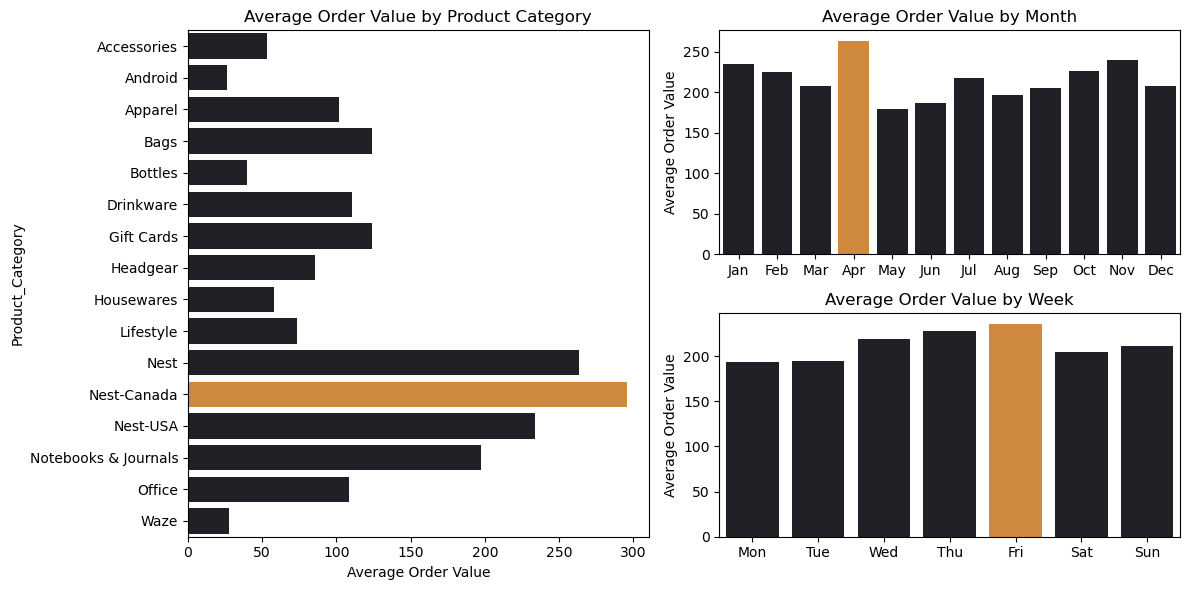

In [289]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.barplot(data=avg_ord_value_by_cat, y='Product_Category', x=avg_ord_value_by_cat[0], color='#1e1f26')
plt.xlabel('Average Order Value')
plt.title('Average Order Value by Product Category')
plt.grid(False)

# Highlighting the highest value bar
highlight_highest_value_bar(avg_ord_value_by_cat[0])


plt.subplot(2,2,2)
sns.barplot(data=avg_ord_value_by_month, x=month_name, y=avg_ord_value_by_month[0], color='#1e1f26')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Month')
plt.grid(False)

highlight_highest_value_bar(avg_ord_value_by_month[0])


plt.subplot(2,2,4)
sns.barplot(data=avg_ord_value_by_week, x=week_name, y=avg_ord_value_by_week[0], color='#1e1f26')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Week')
plt.grid(False)

highlight_highest_value_bar(avg_ord_value_by_week[0])


plt.tight_layout()
plt.show()

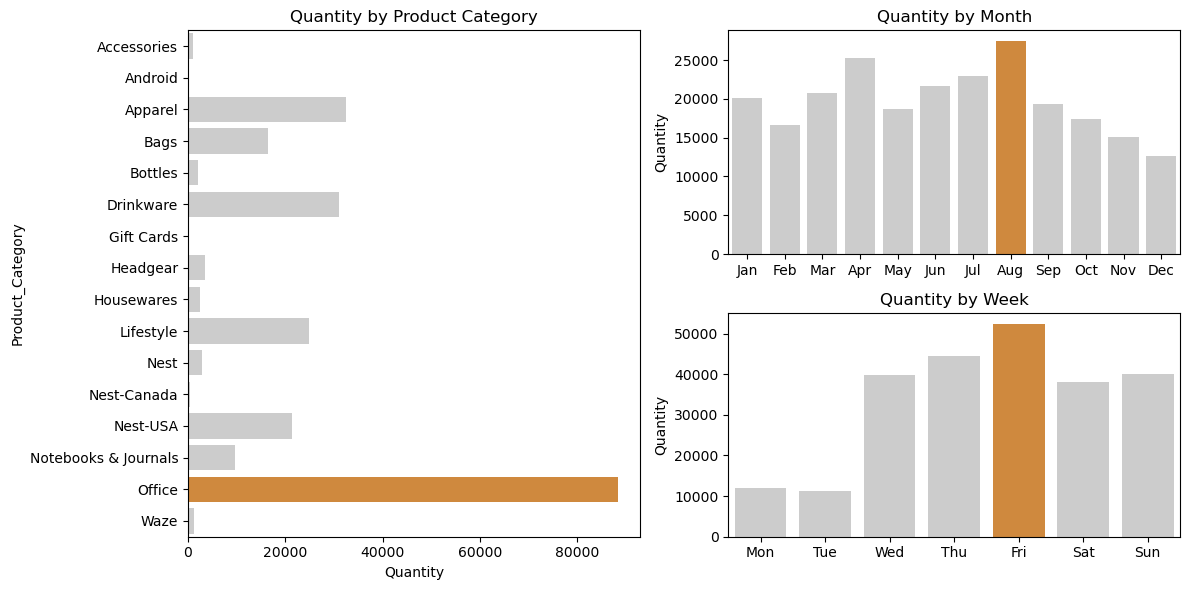

In [290]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.barplot(data=quantity_by_cat, y='Product_Category', x='Quantity', color='#cccccc')
plt.xlabel('Quantity')
plt.title('Quantity by Product Category')
plt.grid(False)

highlight_highest_value_bar(quantity_by_cat.Quantity)

plt.subplot(2,2,2)
sns.barplot(data=quantity_by_month, x=month_name, y='Quantity', color='#cccccc')
#sns.lineplot(data=quantity_by_month, x=month_name, y='Quantity', color='#e3b636', linewidth = 2.5)
plt.ylabel('Quantity')
plt.title('Quantity by Month')
plt.grid(False)
highlight_highest_value_bar(quantity_by_month.Quantity)

plt.subplot(2,2,4)
sns.barplot(data=quantity_by_week, x=week_name, y='Quantity', color='#cccccc')
#sns.lineplot(data=quantity_by_week, x=week_name, y='Quantity', color='#e3b636', linewidth = 2.5)
plt.ylabel('Quantity')
plt.title('Quantity by Week')
plt.grid(False)
highlight_highest_value_bar(quantity_by_week.Quantity)

plt.tight_layout()
plt.show()

> Insights from the above analysis:
>- One trend which is clear from the above is - majority of the purchase is happening on __Fridays__.
>- Nest USA is a favourate product. It genereated highest revenue and also 2nd highest Number of Orders. Its average order value is also very good.


__Number of customer (existing / new ) by Month__

In [291]:
# Convert 'year_month' to string
mom_revenue_data['year_month_str'] = mom_revenue_data['year_month'].astype(str)


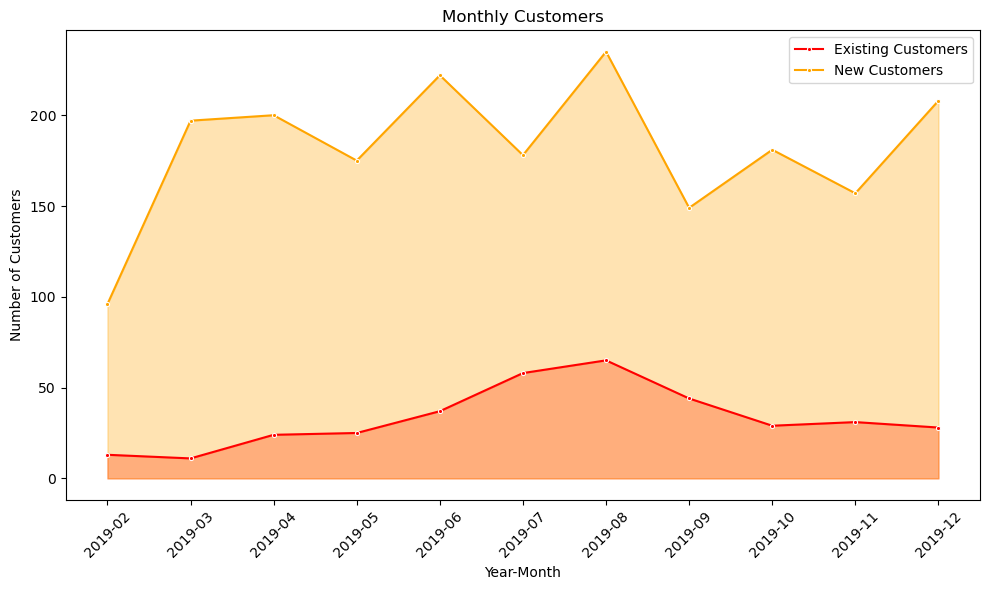

In [292]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting area for existing customers
sns.lineplot(x='year_month_str', y='existing_customers', data=mom_revenue_data, label='Existing Customers', color='red', marker='.')
sns.lineplot(x='year_month_str', y='new_customers', data=mom_revenue_data, label='New Customers', color='orange', marker='.')

# Fill between the lines
plt.fill_between(mom_revenue_data['year_month_str'], mom_revenue_data['existing_customers'], color='red', alpha=0.3)
plt.fill_between(mom_revenue_data['year_month_str'], mom_revenue_data['new_customers'], color='orange', alpha=0.3)

plt.title('Monthly Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

> we can see the New Customers Month on Month were stood around 200 mark. It droped in the month of September.

> We are able to retain the existing customers, infact was trending upwards till August. Then the numbers declined by half. Now it is around 30 existing customers a month.

## Understand the trends/seasonality of sales by category, location, month etc…

In [293]:
cust_360.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'tran_month', 'Gender', 'Location',
       'Tenure_Months', 'Coupon_Code', 'Discount_pct', 'GST', 'Invoice_value',
       'Y_m_tran_dt', 'week_num', 'month_num'],
      dtype='object')

In [294]:
cust_360.Product_Category.nunique(), cust_360.Product_Category.unique()

(16,
 array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
        'Notebooks & Journals', 'Headgear', 'Waze', 'Nest-Canada',
        'Bottles', 'Gift Cards', 'Housewares', 'Android', 'Accessories',
        'Nest'], dtype=object))

In [295]:
cust_360.Location.nunique(), cust_360.Location.unique()

(5,
 array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
       dtype=object))

__Sales Trend by Category__
- There are 16 catrgories 
- I will find the top 3 catrgories for each month based on sales
- and, plot it.

In [296]:
# Group by Month & Category - aggregate to Invoice Vlaue & Find the top 5
top_cat_by_month = pd.DataFrame(cust_360.groupby(['Y_m_tran_dt', 'Product_Category'])['Invoice_value'].agg('sum').groupby(level=0).nlargest(5))
top_cat_by_month.reset_index(allow_duplicates=True, inplace=True)

In [297]:
# Slecet the columns which are not duplicated
top_cat_by_month = top_cat_by_month.loc[:,~top_cat_by_month.columns.duplicated()]

In [298]:
top_cat_by_month.Product_Category.unique()

array(['Nest-USA', 'Apparel', 'Office', 'Drinkware', 'Bags',
       'Notebooks & Journals', 'Nest'], dtype=object)

In [299]:
top_cat_by_month.head(10)

,Y_m_tran_dt,Product_Category,Invoice_value
0,2019-01,Nest-USA,313029.09310
1,2019-01,Apparel,59198.56210
2,2019-01,Office,44931.41480
3,2019-01,Drinkware,22476.56302
4,2019-01,Bags,18136.42876
5,2019-02,Nest-USA,209596.76900
6,2019-02,Apparel,55229.68696
7,2019-02,Office,30102.25160
8,2019-02,Bags,26325.16636
9,2019-02,Drinkware,22988.70548


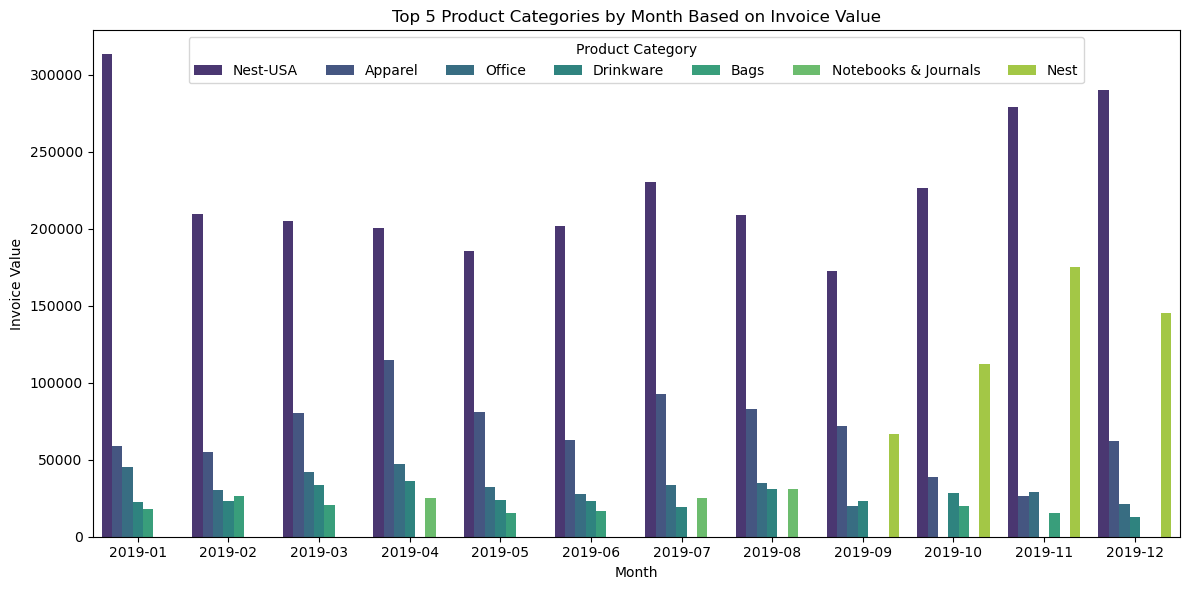

In [300]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cat_by_month, x='Y_m_tran_dt', y='Invoice_value', hue='Product_Category', palette='viridis')
plt.title('Top 5 Product Categories by Month Based on Invoice Value')
plt.xlabel('Month')
plt.ylabel('Invoice Value')
plt.legend(title='Product Category',loc='upper center', ncol=7)
plt.tight_layout()
plt.show()

> Sales Trend by Category:
>- After calculating the top 5 categories for each month we can see there are only 7 out of 16 categories repeated in top 5 list ('Nest-USA', 'Apparel', 'Office', 'Drinkware', 'Bags', 'Notebooks & Journals', 'Nest')
>- __Nest-USA__ stood top across the months. 
>- __Apparel__ is the second top across the months. Apparel sales trended upwards and peaked in April, then stayed below 100000.
>- Interesting to see the sales of __Nest__ from September, there was drasting buying.

__Sales Trend by Location__

In [301]:
cust_360.Location.unique()

array(['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC'],
      dtype=object)

In [302]:
loc_trend = cust_360.groupby(['Y_m_tran_dt','Location'])['Invoice_value'].agg('sum').reset_index()

In [303]:
# Convert 'Y_m_tran_dt' to timestamps
loc_trend['Y_m_tran_dt'] = loc_trend['Y_m_tran_dt'].dt.to_timestamp()

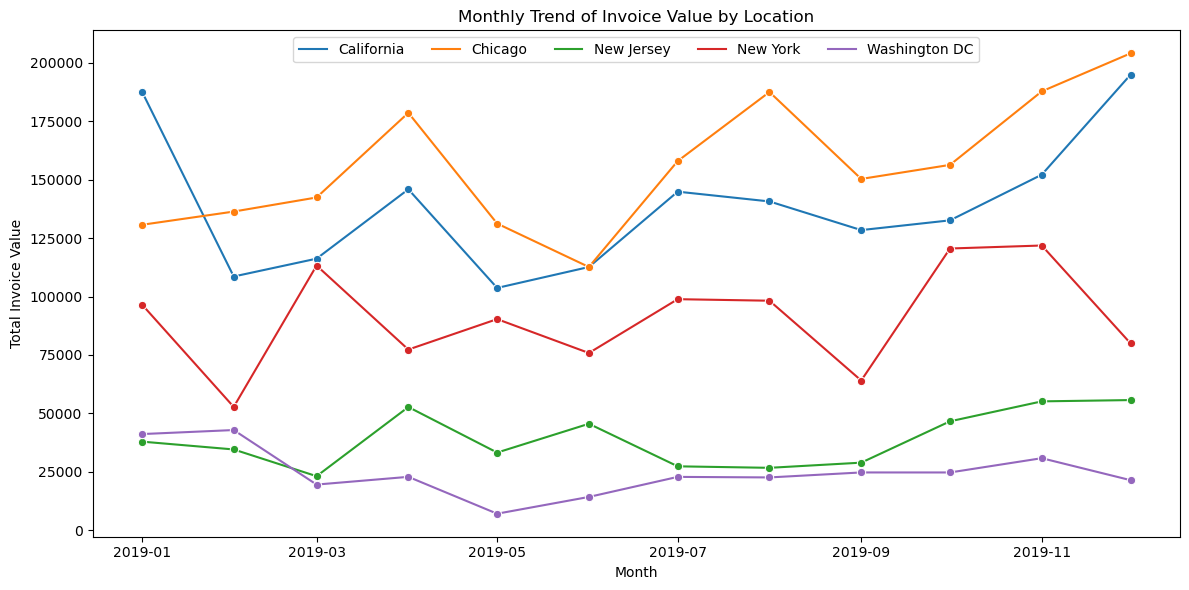

In [304]:
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=loc_trend, x='Y_m_tran_dt', y='Invoice_value', hue='Location', palette='tab10', marker='o')
plt.title('Monthly Trend of Invoice Value by Location')
plt.xlabel('Month')
plt.ylabel('Total Invoice Value')
plt.legend(loc='upper center', ncol=5)
plt.tight_layout()
plt.show()

# Analysing how the number of orders and sales vary with different days
- we need day of the week
- group by day of the week

In [305]:
cust_360.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'tran_month', 'Gender', 'Location',
       'Tenure_Months', 'Coupon_Code', 'Discount_pct', 'GST', 'Invoice_value',
       'Y_m_tran_dt', 'week_num', 'month_num'],
      dtype='object')

In [306]:
# Extract the day of the week
cust_360['Day_of_Week'] = cust_360['Transaction_Date'].dt.day_name()

In [307]:
# Group by day of the week and calculate total number of orders and total sales
daily_orders_sales = cust_360.groupby('Day_of_Week').agg({
    'Transaction_ID': 'nunique',  # Count unique Transaction_ID for number of orders
    'Invoice_value': 'sum'         # Sum Invoice_value for total sales
}).reset_index()

daily_orders_sales

,Day_of_Week,Transaction_ID,Invoice_value
0,Friday,4233,998215.22114
1,Monday,2130,412690.98914
2,Saturday,3872,791109.84389
3,Sunday,3855,813760.87587
4,Thursday,4278,974653.86506
5,Tuesday,2315,450199.82582
6,Wednesday,4378,956286.06506


In [308]:
# Need to sort the days of the week in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [309]:
daily_orders_sales['Day_of_Week'] = pd.Categorical(daily_orders_sales['Day_of_Week'], categories=days_order, ordered=True)
daily_orders_sales = daily_orders_sales.sort_values('Day_of_Week')
daily_orders_sales

,Day_of_Week,Transaction_ID,Invoice_value
1,Monday,2130,412690.98914
5,Tuesday,2315,450199.82582
6,Wednesday,4378,956286.06506
4,Thursday,4278,974653.86506
0,Friday,4233,998215.22114
2,Saturday,3872,791109.84389
3,Sunday,3855,813760.87587


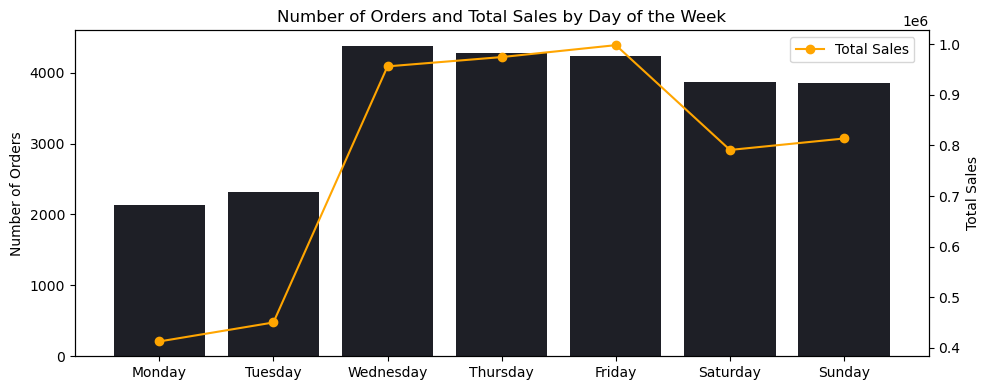

In [310]:
# Plotting the data
plt.figure(figsize=(10, 4))

# Plotting number of orders
plt.bar(daily_orders_sales['Day_of_Week'], daily_orders_sales['Transaction_ID'], color='#1e1f26')

# Adding y-axis label for number of orders
plt.ylabel('Number of Orders')

# Plotting total sales on the secondary y-axis
ax2 = plt.gca().twinx()
ax2.plot(daily_orders_sales['Day_of_Week'], daily_orders_sales['Invoice_value'], color='orange', marker='o', label='Total Sales')

# Adding y-axis label for total sales
ax2.set_ylabel('Total Sales')

# Adding labels and title
plt.title('Number of Orders and Total Sales by Day of the Week')
plt.xlabel('Day of the Week')

# Adding legend
plt.legend(loc='upper left', bbox_to_anchor=(0.83, 1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> trends on Day of the week:
>- Monday & Tuesdays are low in terms of Sales as well as Number of Orders
>- Saturday & Sundays are almost same

# Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month

In [311]:
cust_360.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'tran_month', 'Gender', 'Location',
       'Tenure_Months', 'Coupon_Code', 'Discount_pct', 'GST', 'Invoice_value',
       'Y_m_tran_dt', 'week_num', 'month_num', 'Day_of_Week'],
      dtype='object')

In [312]:
monthly_marketing=marketing.groupby(marketing.Date.dt.to_period('M'))[['Offline_Spend','Online_Spend']].sum()

In [313]:
monthly_marketing['Marketing_spend'] = monthly_marketing.Offline_Spend+monthly_marketing.Online_Spend
monthly_marketing.drop(columns=['Offline_Spend','Online_Spend'], inplace=True)

In [314]:
monthly_marketing=monthly_marketing.reset_index()

In [315]:
monthly_marketing

,Date,Marketing_spend
0,2019-01,154928.95
1,2019-02,137107.92
2,2019-03,122250.09
3,2019-04,157026.83
4,2019-05,118259.64
5,2019-06,134318.14
6,2019-07,120217.85
7,2019-08,142904.15
8,2019-09,135514.54
9,2019-10,151224.65


__Revenue, Marketing Spend, Tax, and Delivery Charges by Month__:

In [316]:
monthly_data = cust_360.groupby('Y_m_tran_dt').agg({
    'Invoice_value': 'sum',
    'GST': 'sum',
    'Delivery_Charges': 'sum'
}).reset_index()
monthly_data

,Y_m_tran_dt,Invoice_value,GST,Delivery_Charges
0,2019-01,494108.22805,536.98,59242.32
1,2019-02,375188.41402,448.68,49216.60
2,2019-03,414574.32480,617.93,60799.94
3,2019-04,477445.08080,593.24,41481.74
4,2019-05,365599.82292,664.79,41396.17
5,2019-06,360972.25757,601.81,37513.58
6,2019-07,451942.54142,762.31,48723.93
7,2019-08,475787.99198,914.77,61099.57
8,2019-09,396514.50944,597.54,41005.42
9,2019-10,480873.17777,542.14,45961.88


In [317]:
monthly_data=monthly_data.merge(monthly_marketing, left_on='Y_m_tran_dt', right_on='Date')
monthly_data.drop(columns='Date', inplace=True)
monthly_data

,Y_m_tran_dt,Invoice_value,GST,Delivery_Charges,Marketing_spend
0,2019-01,494108.22805,536.98,59242.32,154928.95
1,2019-02,375188.41402,448.68,49216.60,137107.92
2,2019-03,414574.32480,617.93,60799.94,122250.09
3,2019-04,477445.08080,593.24,41481.74,157026.83
4,2019-05,365599.82292,664.79,41396.17,118259.64
5,2019-06,360972.25757,601.81,37513.58,134318.14
6,2019-07,451942.54142,762.31,48723.93,120217.85
7,2019-08,475787.99198,914.77,61099.57,142904.15
8,2019-09,396514.50944,597.54,41005.42,135514.54
9,2019-10,480873.17777,542.14,45961.88,151224.65


__Percentage of Marketing Spend out of Revenue and Percentage of Delivery Charges by Month__:

In [318]:
monthly_data['Marketing_spend_percentage'] = (monthly_data['Marketing_spend'] / monthly_data['Invoice_value']) * 100
monthly_data['Delivery_Charges_percentage'] = (monthly_data['Delivery_Charges'] / monthly_data['Invoice_value']) * 100

In [319]:
monthly_data

,Y_m_tran_dt,Invoice_value,GST,Delivery_Charges,Marketing_spend,Marketing_spend_percentage,Delivery_Charges_percentage
0,2019-01,494108.22805,536.98,59242.32,154928.95,31.355266,11.989746
1,2019-02,375188.41402,448.68,49216.60,137107.92,36.543751,13.117836
2,2019-03,414574.32480,617.93,60799.94,122250.09,29.488100,14.665631
3,2019-04,477445.08080,593.24,41481.74,157026.83,32.888983,8.688275
4,2019-05,365599.82292,664.79,41396.17,118259.64,32.346744,11.322809
5,2019-06,360972.25757,601.81,37513.58,134318.14,37.210101,10.392372
6,2019-07,451942.54142,762.31,48723.93,120217.85,26.600251,10.781001
7,2019-08,475787.99198,914.77,61099.57,142904.15,30.035258,12.841764
8,2019-09,396514.50944,597.54,41005.42,135514.54,34.176439,10.341468
9,2019-10,480873.17777,542.14,45961.88,151224.65,31.447928,9.558005


# How marketing spend is impacting on revenue?

In [320]:
np.corrcoef(monthly_data['Marketing_spend'], monthly_data['Invoice_value'])

array([[1.        , 0.79661159],
       [0.79661159, 1.        ]])


Correlation Coefficient between Marketing Spend and Revenue: 0.7966115902434594


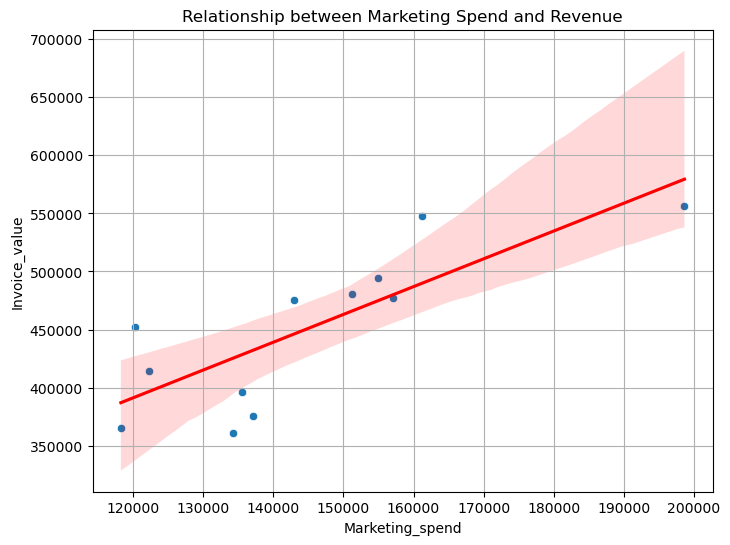

In [321]:
# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(monthly_data['Marketing_spend'], monthly_data['Invoice_value'])[0, 1]
print()
print("Correlation Coefficient between Marketing Spend and Revenue:", correlation_coefficient)

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Marketing_spend', y='Invoice_value', data=monthly_data)
plt.title('Relationship between Marketing Spend and Revenue')
plt.xlabel('Marketing Spend')
plt.ylabel('Revenue')
plt.grid(True)

#how the dependent variable ('Invoice_value') changes with respect to the independent variable ('Marketing_spend').
# Fit a regression line
sns.regplot(x='Marketing_spend', y='Invoice_value', data=monthly_data, scatter=False, color='red')

plt.show()

> Correlation Coefficient between Marketing Spend and Revenue: __0.797__ signifies the strong positive correlation.
> - The regression line shows how the average 'Invoice_value' changes with respect to changes in 'Marketing_spend'.

 Which product was appeared in the transactions?

In [322]:
# Get unique product descriptions
unique_products = cust_360['Product_Description'].unique()

# Print unique products
print("Products appeared in the transactions:")
for product in unique_products:
    print(product)


Products appeared in the transactions:
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel
Google Laptop and Cell Phone Stickers
Google Men's 100% Cotton Short Sleeve Hero Tee Black
Google Canvas Tote Natural/Navy
Sport Bag
Google 22 oz Water Bottle
Google Infuser-Top Water Bottle
Engraved Ceramic Google Mug
Maze Pen
Galaxy Screen Cleaning Cloth
Badge Holder
YouTube Men's Short Sleeve Hero Tee Black
Nest Cam Outdoor Security Camera - USA
Nest Protect Smoke + CO White Wired Alarm-USA
Google Men's 100% Cotton Short Sleeve Hero Tee Red
Google Women's Short Sleeve Hero Tee White
Red Shine 15 oz Mug
Compact Selfie Stick
Ballpoint LED Light Pen
Color Changing Grip Pen
Colored Pencil Set
Spiral Notebook and Pen Set
Nest Cam Indoor Security Camera - USA
Android Sticker Sheet Ultra Removable
23 oz Wide Mouth Sport Bottle
YouTube Custom Decals
YouTube Spiral Journal with Pen
Google Women's Quilted Insulated Vest Black
Google 17oz Stainless Steel Sport Bottle
Google Men's Bike Short Sleeve Tee

# Which product was purchased mostly based on the quantity?

In [323]:
# Group the data by 'Product_SKU' and sum the 'Quantity' for each product
product_quantity = cust_360.groupby('Product_SKU')['Quantity'].sum()

# Find the product with the highest total quantity
most_purchased_product = product_quantity.idxmax()
total_quantity = product_quantity.max()

print(f"The product '{most_purchased_product}' was purchased the most based on quantity with a total of {total_quantity} units.")

The product 'GGOEGGOA017399' was purchased the most based on quantity with a total of 16234 units.


## Summary of EDA:

Customer Acquisition 
- Average number of new customers per month: 181.64
- Month with the highest number of new customers: August 2019 (New Customers: 235)

Customer Retention 
- Average customer retention rate: 15.15%
- Month with the highest customer retention rate: August 2019 (Retention Rate: 27.54%)

Revenue
- Revenue from existing customers fluctuates more significantly compared to the revenue from new customers.

# 3. Performing Customer Segmentation

In [324]:
cust_360.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'tran_month', 'Gender', 'Location',
       'Tenure_Months', 'Coupon_Code', 'Discount_pct', 'GST', 'Invoice_value',
       'Y_m_tran_dt', 'week_num', 'month_num', 'Day_of_Week'],
      dtype='object')

## Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.

> <div class="alert alert-block alert-info"> <b>RFM segmentation</b>: <br>
    ➤ <a href="https://medium.com/@yennhi95zz/using-rfm-analysis-for-effective-customer-segmentation-in-marketing-4964a99bf606">RFM Analysis for Effective Customer Segmentation in Marketing</a> <br>
    ➤ <a href = "https://youtu.be/WvmFjuGxneI?si=mygz5GKTQ0XRyKwF"> How to do RFM Customer Segmentation using Python Machine Learning</a>
    </div>

Recency (R): How recently did the customer make a purchase? Customers who made a purchase more recently are likely to be more valuable.
- Calculate Recency: 
- Determine how recently each customer made a purchase. 
- Calculate the difference between the customer's most recent purchase date and the current date.

Frequency (F): How often does the customer make a purchase? Customers who make purchases more frequently are also likely to be more valuable.
- Calculate Frequency: 
- Count the number of purchases made by each customer within a specific time period.

Monetary (M): How much money does the customer spend? Customers who spend more money are typically more valuable
- Calculate Monetary: 
- Calculate the total monetary value of purchases made by each customer.


In [325]:
# taking the current date as 1 day after the last transaction date
current_date = cust_360.Transaction_Date.max() + datetime.timedelta(days=1)

In [326]:
# Calculate the recency, frequrncy & monetory values
segment = cust_360.groupby('CustomerID').agg(
    Recency = ('Transaction_Date', lambda x: (current_date - x.max()).days),  # Calculate recency
    Frequency = ('Transaction_ID', 'count'),  # Calculate frequency
    Monetary = ('Invoice_value', 'sum' ) # Calculate monetary value
)
segment

,Recency,Frequency,Monetary
CustomerID,,,
12346,108,2,174.98174
12347,60,60,15688.63436
12348,74,23,1689.55594
12350,18,17,1467.43528
12356,108,36,2007.42900
...,...,...,...
18259,271,7,860.68600
18260,88,40,3016.54372
18269,195,8,166.90750


In [327]:
# Define quartiles for each RFM score
recency_quartiles = pd.qcut(segment['Recency'], q=4, labels=['4', '3', '2', '1']) # 4 - being more recent
frequency_quartiles = pd.qcut(segment['Frequency'], q=4, labels=['1', '2', '3', '4']) # 4 - being more frequent
monetary_quartiles = pd.qcut(segment['Monetary'], q=4, labels=['1', '2', '3', '4']) # 4 - being highest moetary value

In [328]:
# Assign RFM scores to each customer
segment['RecencyScore'] = recency_quartiles
segment['FrequencyScore'] = frequency_quartiles
segment['MonetaryScore'] = monetary_quartiles

> In a retail business, a customer who searches and purchases products every month will have a higher recency and frequency score than monetary score. Accordingly, the RFM score could be calculated by giving more weight to R and F scores than M

In [329]:
# Combine RFM scores into a single RFM Score

# Assigning the weights for r, f, m | assuming we are dealing with retial business
recency_weight = 3
frequency_weight = 2
monetary_weight = 1

# Calculate weighted sum 
segment['RFM_Score'] = (segment['RecencyScore'].astype('int') * recency_weight +
                         segment['FrequencyScore'].astype('int') * frequency_weight +
                         segment['MonetaryScore'].astype('int') * monetary_weight)

In [330]:
segment.sort_values(by='Frequency', ascending=False)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
CustomerID,,,,,,,
12748,108,695,86840.74588,3,4,4,21
15311,13,587,86911.31864,4,4,4,24
14606,1,575,66012.45185,4,4,4,24
17841,18,572,55459.03860,4,4,4,24
14911,11,523,58332.81569,4,4,4,24
...,...,...,...,...,...,...,...
14090,103,1,21.57600,3,1,1,12
14616,62,1,136.90000,3,1,1,12
16424,157,1,18.54340,2,1,1,9


In [331]:
# We need the values to be in numeric for binning, so converting the object type to int
#segment['RFM_Segment'] = segment['RFM_Segment'].astype('int')

In [332]:
segment['RFM_Score'].max(), segment['RFM_Score'].min()

(24, 6)

In [333]:
# Define RFM segments based on scores
rfm_segments = ['Standard', 'Silver', 'Gold', 'Premium']

In [334]:
# Assign segment names to customers
segment['heuristic_segment'] = pd.cut(segment['RFM_Score'], bins=4, labels=rfm_segments)

In [335]:
segment

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,heuristic_segment
CustomerID,,,,,,,,
12346,108,2,174.98174,3,1,1,12,Silver
12347,60,60,15688.63436,3,4,4,21,Premium
12348,74,23,1689.55594,3,3,2,17,Gold
12350,18,17,1467.43528,4,2,2,18,Gold
12356,108,36,2007.42900,3,3,2,17,Gold
...,...,...,...,...,...,...,...,...
18259,271,7,860.68600,1,1,2,7,Standard
18260,88,40,3016.54372,3,3,3,18,Gold
18269,195,8,166.90750,2,1,1,9,Standard


In [336]:
segment.groupby('heuristic_segment')['heuristic_segment'].count()

heuristic_segment
Standard    344
Silver      495
Gold        293
Premium     336
Name: heuristic_segment, dtype: int64

In [337]:
segment.groupby('heuristic_segment')["Recency", "Frequency", "Monetary"]. mean()

,Recency,Frequency,Monetary
heuristic_segment,,,
Standard,253.441860,7.816860,737.133727
Silver,168.840404,24.438384,2337.150029
Gold,90.238908,37.102389,3593.758915
Premium,47.883929,81.151786,8730.601362


__Strategy for each segment:__

Premium Customers:
> Frequent and recent shoppers. Heavy spendings. ⇒ Potential to be target customers for launch of new products. <br>

Gold Customers:
> Recent shopper with low frequecy and spending. ⇒ Emphasizing customer relationship managemet to enhance shopping experience and hence strengthen the engagement.

Silver Customers:
> Frequent and heavy spent shoppers. It has been some time since last transaction. ⇒ Figuring out the reasons of leaving. Customized marketing plans encouraging purchase again.

Standard Customers:
> Low frequency and spending amount, not placing an order recently. ⇒ Business might have lost them. Survey to be done on reason of being churned. Enhance the quality of products or services to avoid further losing.

In [338]:
# Merge the segment information back into the original dataset
cust_360 = cust_360.merge(segment[['heuristic_segment']], on='CustomerID', how='left')

## Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [339]:
# Select relevant features and preprocess the data
features = ['Recency', 'Frequency', 'Monetary']
X = segment[features]

In [340]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

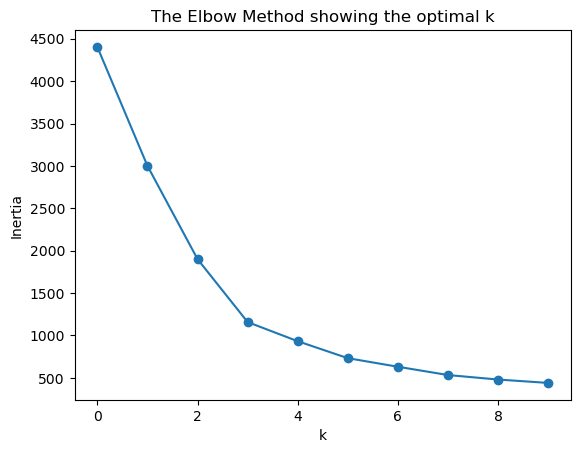

In [341]:
# finding the k value using ELBOW method:

inertia=[]
for i in np.arange (1,11): 
    kmeans= KMeans(n_clusters=i) #run k-means clustering on the dataset for a range of k values
    kmeans. fit(X_scaled) 
    inertia.append(kmeans.inertia_) #calculate the sum of squared distances (inertia) from each point to its assigned center

plt. plot(inertia, marker='o') #Plotting these distances against the k values
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

> Besed on the ELBOW method - we can take the number of clusters = 3

In [342]:
# Choose the number of clusters (K)
k = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
segment['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [343]:
segment

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,heuristic_segment,KMeans_Cluster
CustomerID,,,,,,,,,
12346,108,2,174.98174,3,1,1,12,Silver,0
12347,60,60,15688.63436,3,4,4,21,Premium,0
12348,74,23,1689.55594,3,3,2,17,Gold,0
12350,18,17,1467.43528,4,2,2,18,Gold,0
12356,108,36,2007.42900,3,3,2,17,Gold,0
...,...,...,...,...,...,...,...,...,...
18259,271,7,860.68600,1,1,2,7,Standard,1
18260,88,40,3016.54372,3,3,3,18,Gold,0
18269,195,8,166.90750,2,1,1,9,Standard,1


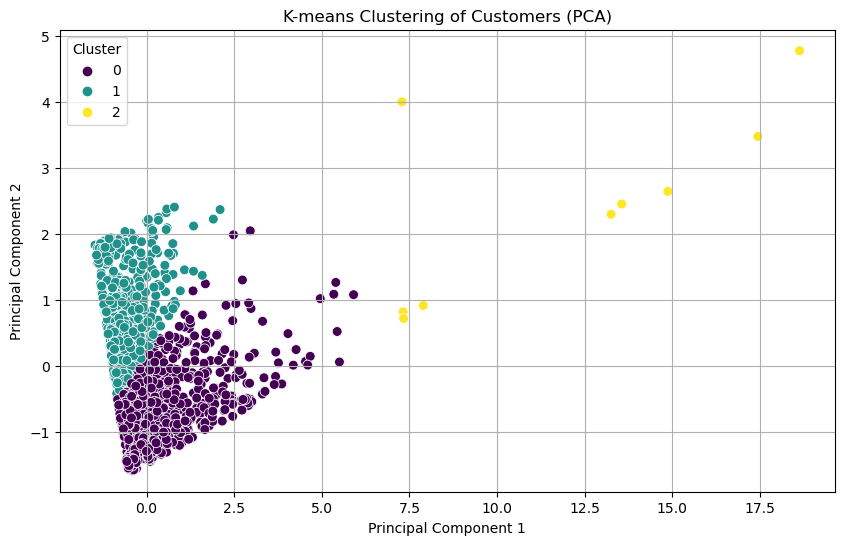

In [344]:
# Reduce dimensionality to 2 dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=segment['KMeans_Cluster'], palette='viridis', s=50)
plt.title('K-means Clustering of Customers (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [345]:
segment['KMeans_Cluster'].value_counts()

0    810
1    649
2      9
Name: KMeans_Cluster, dtype: int64

In [346]:
segment.groupby('KMeans_Cluster')["Recency", "Frequency", "Monetary"]. mean()

,Recency,Frequency,Monetary
KMeans_Cluster,,,
0,70.255556,44.193827,4517.405868
1,240.101695,19.933744,1915.846255
2,61.777778,465.555556,54937.079309


- Cluster '0' is having Recenct, low Frequency, low Monetory scores  = 810 customers
- Cluster '1' is having not Recenct, low Frequency, low Monetory scores = 649 customers
- Cluster '2' is having very Recenct, high Frequency, high Monetory scores = __09 customers__

# 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
- First define dependent variable with categories low value, medium value, high value using customer revenue. 
- Then perform Classification model

> __Customer lifetime value (CLV) is the total revenue or profit generated by a customer over the entire course of their relationship with our business__
- Calculate the total revenue for each customer. -- already calculated in segment table
- Define CLV categories

In [347]:
cust_360.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'tran_month', 'Gender', 'Location',
       'Tenure_Months', 'Coupon_Code', 'Discount_pct', 'GST', 'Invoice_value',
       'Y_m_tran_dt', 'week_num', 'month_num', 'Day_of_Week',
       'heuristic_segment'],
      dtype='object')

In [348]:
# Define dependent variable based on revenue quantiles
segment['CLV_Category'] = pd.qcut(segment['Monetary'], q=3, labels=['Low Value', 'Medium Value', 'High Value'])

In [349]:
segment.head(2)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,heuristic_segment,KMeans_Cluster,CLV_Category
CustomerID,,,,,,,,,,
12346,108,2,174.98174,3,1,1,12,Silver,0,Low Value
12347,60,60,15688.63436,3,4,4,21,Premium,0,High Value


In [350]:
# Define features and target variable
X = segment[['Recency', 'Frequency', 'Monetary']]  # Features
y = segment['CLV_Category']  # Target variable

In [351]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
#from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [352]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [353]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00        98
   Low Value       1.00      1.00      1.00        94
Medium Value       1.00      1.00      1.00       102

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [354]:
print(confusion_matrix(y_test, y_pred))

[[ 98   0   0]
 [  0  94   0]
 [  0   0 102]]


In [355]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the model with the best parameters
best_estimator.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shivalingesh/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00        98
   Low Value       1.00      1.00      1.00        94
Medium Value       1.00      1.00      1.00       102

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [356]:
best_params

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

Checking how different model will perform:

In [357]:
# Initialize and train the GBC  model
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Generate classification report
print('GradientBoostingClassifier report:')
print(classification_report(y_test, y_pred))

GradientBoostingClassifier report:
              precision    recall  f1-score   support

  High Value       1.00      1.00      1.00        98
   Low Value       1.00      1.00      1.00        94
Medium Value       1.00      1.00      1.00       102

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [358]:
print(confusion_matrix(y_test, y_pred))

[[ 98   0   0]
 [  0  94   0]
 [  0   0 102]]


In [359]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [360]:
from sklearn.model_selection import cross_val_score

# Perform stratified k-fold cross-validation (with k=5)
cv_scores = cross_val_score(gbc, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


Predicting Customer lifetime value
- Both the RandomForest CLassifier and the GradientBoostingClassifier are giving perfect accuracy, precision, recall and f1-scores.
- Upon checking the crossvalidation there also we are getting the mean accuracy of 100%
- Since the data size is small (1468 rows) it became easy for the model to learn. Hence it is performing perfectly on the test data.

# 5. Cross-Selling (Which products are selling together)
You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

### Market Basket Analysis
Market Basket Analysis (MBA) is a data mining technique used to uncover associations between products or items frequently purchased together by customers.
1. __identifying frequent itemsets__, which are combinations of items that occur together frequently in transactions. 
    - done using algorithms such as the Apriori algorithm or FP-Growth algorithm.
2. Support is a measure used to quantify the frequency with which a particular itemset appears in the dataset.
    - High support indicates that the itemset is frequently purchased together.
    >- How frequently the itemset (A, B) appears in the data
3. Once frequent itemsets are identified, association rules are generated to describe the relationships between items. Association rules are typically in the form of "If {item A} is purchased, then {item B} is also likely to be purchased.
    - Confidence measures the likelihood that the presence of item A in a transaction will also lead to the presence of item B. 
    >- How frequently {A, B} are bought together when customer bought {A}
    - Lift measures the strength of association between items A and B compared to what would be expected if they were statistically independent.
    >- Greater the limit - stroger the association

In [361]:
cust_360.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'tran_month', 'Gender', 'Location',
       'Tenure_Months', 'Coupon_Code', 'Discount_pct', 'GST', 'Invoice_value',
       'Y_m_tran_dt', 'week_num', 'month_num', 'Day_of_Week',
       'heuristic_segment'],
      dtype='object')

In [362]:
cust_360.Transaction_ID.nunique()

25061

In [363]:
# Step 1: Convert the transactional data into a one-hot encoded format
basket = (cust_360.groupby(['Transaction_ID', 'Product_Category'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction_ID'))

In [364]:
basket

Product_Category,Accessories,Android,Apparel,Bags,Bottles,Drinkware,Gift Cards,Headgear,Housewares,Lifestyle,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
Transaction_ID,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16682,0.0,0.0,10.0,16.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0
16684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48494,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [365]:
# Convert quantities to binary values (0/1)
basket[basket > 0] = 1

In [366]:
# Step 2: Perform one-hot encoding for Apriori algorithm
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [367]:
basket_sets = basket.applymap(encode_units)

In [368]:
# Step 3: Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)

In [369]:
# items that are frequently purchased together:
frequent_itemsets

,support,itemsets
0,0.324369,(Apparel)
1,0.069790,(Bags)
2,0.103029,(Drinkware)
3,0.068313,(Lifestyle)
4,0.078768,(Nest)
5,0.463908,(Nest-USA)
6,0.140697,(Office)
7,0.045649,"(Drinkware, Apparel)"
8,0.033079,"(Lifestyle, Apparel)"
9,0.062128,"(Office, Apparel)"


In [370]:
# Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold=0.5)

In [371]:
# Step 5: Display the association rules
print("Association Rules:")
rules

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Drinkware),(Apparel),0.103029,0.324369,0.045649,0.443067,1.365938,0.012229,1.213130,0.298674
1,(Apparel),(Drinkware),0.324369,0.103029,0.045649,0.140731,1.365938,0.012229,1.043877,0.396522
2,(Lifestyle),(Apparel),0.068313,0.324369,0.033079,0.484229,1.492836,0.010921,1.309945,0.354340
3,(Apparel),(Lifestyle),0.324369,0.068313,0.033079,0.101981,1.492836,0.010921,1.037491,0.488630
4,(Office),(Apparel),0.140697,0.324369,0.062128,0.441577,1.361343,0.016491,1.209892,0.308891
5,(Apparel),(Office),0.324369,0.140697,0.062128,0.191536,1.361343,0.016491,1.062884,0.392864
6,(Drinkware),(Office),0.103029,0.140697,0.047484,0.460883,3.275720,0.032988,1.593909,0.774522
7,(Office),(Drinkware),0.140697,0.103029,0.047484,0.337493,3.275720,0.032988,1.353905,0.808473
8,(Office),(Lifestyle),0.140697,0.068313,0.035114,0.249575,3.653381,0.025503,1.241545,0.845197
9,(Lifestyle),(Office),0.068313,0.140697,0.035114,0.514019,3.653381,0.025503,1.768182,0.779533


# Predicting Next Purchase Day
- (How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)
- For this, we need create dependent variable at customer level (average days per one transaction for only <u>repeat customers</u> and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

In [372]:
# Filter for repeat customers
repeat_customers = cust_360[cust_360.duplicated(subset='CustomerID')]

In [373]:
# avg number of days between each transaction for a particular customer.
avg_days_btw_transaction = repeat_customers.groupby('CustomerID')['Transaction_Date'].apply(lambda x: x.diff().mean().days).dropna().reset_index()
avg_days_btw_transaction

,CustomerID,Transaction_Date
0,12347,3.0
1,12348,5.0
2,12350,0.0
3,12356,0.0
4,12359,0.0
...,...,...
1349,18256,0.0
1350,18259,0.0
1351,18260,2.0
1352,18269,12.0


In [399]:
# Dividing customers into groups 0-30 days, 30-60 days, 60-90 days and 90+ days:
avg_days_btw_transaction['Next_Purchase']=pd.cut(avg_days_btw_transaction['Transaction_Date'], bins=[-1, 30, 60, 90, float('inf')],
                                                      labels=['0-30 days', '30-60 days', '60-90 days', '90+ days'])
avg_days_btw_transaction.head(3)

,CustomerID,Transaction_Date,Next_Purchase
0,12347,3.0,0-30 days
1,12348,5.0,0-30 days
2,12350,0.0,0-30 days


In [400]:
model_df = pd.merge(segment,avg_days_btw_transaction,on='CustomerID', how = 'right')

In [401]:
model_df.head(3)

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,heuristic_segment,KMeans_Cluster,CLV_Category,Transaction_Date,Next_Purchase
0,12347,60,60,15688.63436,3,4,4,21,Premium,0,High Value,3.0,0-30 days
1,12348,74,23,1689.55594,3,3,2,17,Gold,0,Medium Value,5.0,0-30 days
2,12350,18,17,1467.43528,4,2,2,18,Gold,0,Medium Value,0.0,0-30 days


In [402]:
# Builiding Classifiaction Model:

In [403]:
label_encoder = LabelEncoder() #bcz these values are Ordinal-Categorical variable
model_df['heuristic_segment'] = label_encoder.fit_transform(model_df['heuristic_segment'])
model_df['KMeans_Cluster'] = label_encoder.fit_transform(model_df['KMeans_Cluster'])
model_df['CLV_Category'] = label_encoder.fit_transform(model_df['CLV_Category'])

In [404]:
model_df.head(3)

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,heuristic_segment,KMeans_Cluster,CLV_Category,Transaction_Date,Next_Purchase
0,12347,60,60,15688.63436,3,4,4,21,1,0,0,3.0,0-30 days
1,12348,74,23,1689.55594,3,3,2,17,0,0,2,5.0,0-30 days
2,12350,18,17,1467.43528,4,2,2,18,0,0,2,0.0,0-30 days


In [405]:
# Split the dataset into features and target variable
X = model_df.drop(['Next_Purchase'], axis=1)  # Features
y = model_df['Next_Purchase']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [406]:
# Create and train a Random Forest classifier 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [407]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.988929889298893


In [408]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   0-30 days       1.00      1.00      1.00       268
  30-60 days       0.00      0.00      0.00         1
  60-90 days       0.00      0.00      0.00         2

    accuracy                           0.99       271
   macro avg       0.33      0.33      0.33       271
weighted avg       0.99      0.99      0.99       271



In [409]:
metrics.confusion_matrix(y_test, y_pred)

array([[268,   0,   0],
       [  1,   0,   0],
       [  0,   2,   0]])

> The overall accuracy of the model is high at 98.89%, indicating that the model performs well in predicting the next purchase day for the majority of instances.

> Precision, Recall, and F1-Score:
>- For the class "0-30 days", the precision, recall, and F1-score are all excellent at 99%, indicating that the model performs very well in correctly predicting instances where the next purchase occurs within 0-30 days.
>- For the classes "30-60 days" and "60-90 days", however, the precision, recall, and F1-score are all 0%. This suggests that the model struggles to correctly predict instances where the next purchase occurs between 30-60 days and 60-90 days. Which can be highlighted by confusion matrix.

In [410]:
y.value_counts()

0-30 days     1345
30-60 days       7
60-90 days       2
90+ days         0
Name: Next_Purchase, dtype: int64

It's worth noting that the classes "30-60 days" and "60-90 days" have very few instances, resulting in __imbalanced classes.__

Lets first club classes and make it 2 classes (0-30 days and 30+ days)



In [411]:
# Re-dividing customers into groups 0-30 days, 30+ days:
avg_days_btw_transaction['Next_Purchase']=pd.cut(avg_days_btw_transaction['Transaction_Date'], bins=[-1, 30, float('inf')],
                                                      labels=['0-30 days', '30+ days'])
model_df = pd.merge(segment,avg_days_btw_transaction,on='CustomerID', how = 'right')

label_encoder = LabelEncoder()
model_df['heuristic_segment'] = label_encoder.fit_transform(model_df['heuristic_segment'])
model_df['KMeans_Cluster'] = label_encoder.fit_transform(model_df['KMeans_Cluster'])
model_df['CLV_Category'] = label_encoder.fit_transform(model_df['CLV_Category'])

In [412]:
model_df.Next_Purchase.value_counts()

0-30 days    1345
30+ days        9
Name: Next_Purchase, dtype: int64

### to address the imbalance issue, I am using more advanced methods like SMOTE

In [413]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354 entries, 0 to 1353
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         1354 non-null   int64   
 1   Recency            1354 non-null   int64   
 2   Frequency          1354 non-null   int64   
 3   Monetary           1354 non-null   float64 
 4   RecencyScore       1354 non-null   category
 5   FrequencyScore     1354 non-null   category
 6   MonetaryScore      1354 non-null   category
 7   RFM_Score          1354 non-null   int64   
 8   heuristic_segment  1354 non-null   int64   
 9   KMeans_Cluster     1354 non-null   int64   
 10  CLV_Category       1354 non-null   int64   
 11  Transaction_Date   1354 non-null   float64 
 12  Next_Purchase      1354 non-null   category
dtypes: category(4), float64(2), int64(7)
memory usage: 111.8 KB


In [414]:
# Convert category labels to numerical values
model_df['Next_Purchase'] = model_df['Next_Purchase'].cat.codes
model_df['RecencyScore'] = model_df['RecencyScore'].cat.codes
model_df.FrequencyScore = model_df.FrequencyScore.cat.codes
model_df.MonetaryScore = model_df.MonetaryScore.cat.codes

In [415]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354 entries, 0 to 1353
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1354 non-null   int64  
 1   Recency            1354 non-null   int64  
 2   Frequency          1354 non-null   int64  
 3   Monetary           1354 non-null   float64
 4   RecencyScore       1354 non-null   int8   
 5   FrequencyScore     1354 non-null   int8   
 6   MonetaryScore      1354 non-null   int8   
 7   RFM_Score          1354 non-null   int64  
 8   heuristic_segment  1354 non-null   int64  
 9   KMeans_Cluster     1354 non-null   int64  
 10  CLV_Category       1354 non-null   int64  
 11  Transaction_Date   1354 non-null   float64
 12  Next_Purchase      1354 non-null   int8   
dtypes: float64(2), int64(7), int8(4)
memory usage: 111.1 KB


In [416]:
# Split the dataset into features and target variable
X = model_df.drop(['Next_Purchase'], axis=1)  # Features
y = model_df['Next_Purchase']  # Target variable

In [417]:
from imblearn.over_sampling import SMOTE

In [418]:
# Instantiate the SMOTE object:
smote = SMOTE()

#Resample your data using SMOTE:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [419]:
y_resampled.value_counts()

0    1345
1    1345
Name: Next_Purchase, dtype: int64

In [420]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [421]:
# Re-Build Random Forest classifier 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [422]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00       287

    accuracy                           1.00       538
   macro avg       1.00      1.00      1.00       538
weighted avg       1.00      1.00      1.00       538



In [423]:
metrics.confusion_matrix(y_test, y_pred)

array([[251,   0],
       [  0, 287]])

> The model performance after resampling appears to have improved significantly, with high precision, recall, and F1-score values across both classes.
>- This indicates that the model is now better able to classify instances belonging to the both classes.

# 7. Perform cohort analysis by defining below cohorts
## Customers who started in each month and understand their behaviour


For Cohort analysis:
1. Defining the Cohort: create cohorts based on customer acquisition month.
    - grouping customers who started transactions for the first time
2. Choose Analysis Period: Track retention over months to understand how customer behavior changes over time.
3. Select Metrics to analyze for each cohort within the chosen timeframe
    - Number of Acquired Customers
    - Retention Rate
4. Analyze Results:
    - Compare retention rates across different customer cohorts acquired in each month.
    - Identify the month cohort with the highest retention rate. 
    - Look for trends in retention rates. 

Utilize charts like line graphs or bar charts to visually represent the retention rates for each cohort over the chosen time period.
Annotate the chart to highlight the month cohort with the maximum retention rate.


Define Cohorts: Create cohorts based on the __customer acquisition__ month.

In [424]:
# Extract the month and year of the first purchase for each customer
cust_360['First_Transaction_Month'] = cust_360.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')

In [425]:
# Grouping customers based on their first transaction month
cohorts = cust_360.groupby('First_Transaction_Month').agg(New_Customers=('CustomerID', 'nunique'),
                                                         AOV_new_cust=('Invoice_value','mean')).reset_index()

In [426]:
cohorts

,First_Transaction_Month,New_Customers,AOV_new_cust
0,2019-01,215,112.196541
1,2019-02,96,102.365211
2,2019-03,177,100.284844
3,2019-04,163,104.370459
4,2019-05,112,85.118492
5,2019-06,137,88.617898
6,2019-07,94,93.110026
7,2019-08,135,81.864473
8,2019-09,78,88.803009
9,2019-10,87,121.751680


Calculate Retention Rate: Calculate the retention rate for each cohort.

In [427]:
#transactions done by customers in thier first transacion month
first_month_transaction = cust_360[cust_360['Transaction_Date'].dt.to_period('M') == cust_360['First_Transaction_Month']]

In [429]:
#transactions done by customers in month other than thier first transacion month
next_month_transaction = cust_360[cust_360['Transaction_Date'].dt.to_period('M') > cust_360['First_Transaction_Month']]

In [562]:
# Calculate the number of customers who made repeat purchases in each month
repeat_customers = next_month_transaction.groupby(['First_Transaction_Month']).agg(Repeat_Customers=('CustomerID', 'nunique'),
                                                               AOV_repeat_cust=('Invoice_value','mean')).reset_index()
repeat_customers

,First_Transaction_Month,Repeat_Customers,AOV_repeat_cust
0,2019-01,119,106.632369
1,2019-02,67,91.309770
2,2019-03,106,103.549794
3,2019-04,80,111.769283
4,2019-05,53,100.763979
5,2019-06,57,89.218766
6,2019-07,32,110.363639
7,2019-08,40,136.761792
8,2019-09,9,110.377505
9,2019-10,10,162.362177


In [563]:
# Merge the repeat customers data with the cohorts data
cohorts = pd.merge(cohorts, repeat_customers, on='First_Transaction_Month')
cohorts

,First_Transaction_Month,New_Customers,AOV_new_cust,Repeat_Customers,AOV_repeat_cust
0,2019-01,215,112.196541,119,106.632369
1,2019-02,96,102.365211,67,91.309770
2,2019-03,177,100.284844,106,103.549794
3,2019-04,163,104.370459,80,111.769283
4,2019-05,112,85.118492,53,100.763979
5,2019-06,137,88.617898,57,89.218766
6,2019-07,94,93.110026,32,110.363639
7,2019-08,135,81.864473,40,136.761792
8,2019-09,78,88.803009,9,110.377505
9,2019-10,87,121.751680,10,162.362177


In [564]:
# Calculate retention rate for each cohort
cohorts['Retention_Rate'] = cohorts['Repeat_Customers'] / cohorts['New_Customers'] * 100
cohorts

,First_Transaction_Month,New_Customers,AOV_new_cust,Repeat_Customers,AOV_repeat_cust,Retention_Rate
0,2019-01,215,112.196541,119,106.632369,55.348837
1,2019-02,96,102.365211,67,91.309770,69.791667
2,2019-03,177,100.284844,106,103.549794,59.887006
3,2019-04,163,104.370459,80,111.769283,49.079755
4,2019-05,112,85.118492,53,100.763979,47.321429
5,2019-06,137,88.617898,57,89.218766,41.605839
6,2019-07,94,93.110026,32,110.363639,34.042553
7,2019-08,135,81.864473,40,136.761792,29.629630
8,2019-09,78,88.803009,9,110.377505,11.538462
9,2019-10,87,121.751680,10,162.362177,11.494253


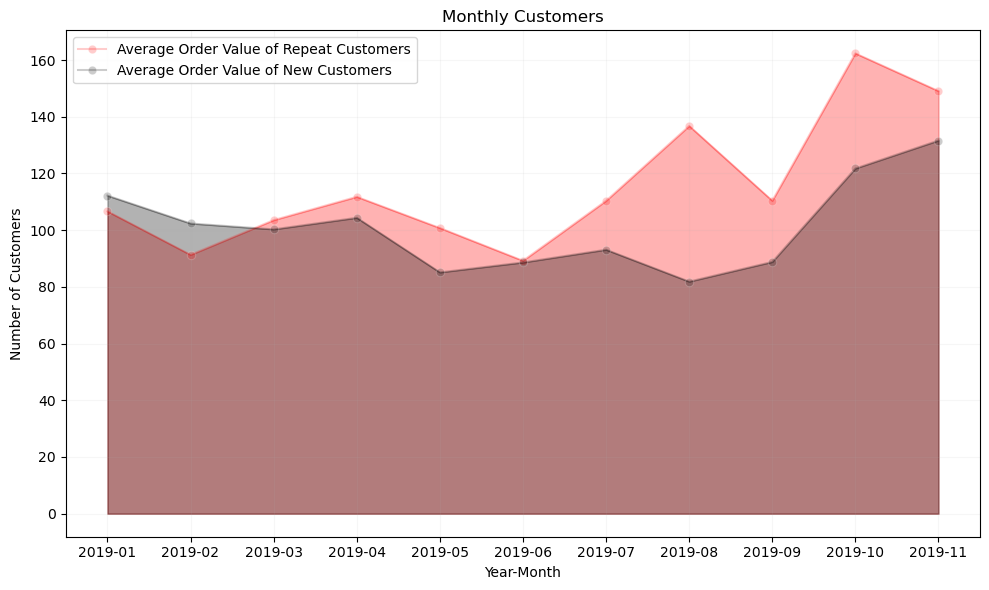

In [576]:
# Plotting
plt.figure(figsize=(10, 6))

x_labels = cohorts.First_Transaction_Month.astype('str')

# Plotting area for existing customers
sns.lineplot(x=x_labels, y='AOV_repeat_cust', data=cohorts, label='Average Order Value of Repeat Customers', color='red', marker='o', alpha=0.2)
sns.lineplot(x=x_labels, y='AOV_new_cust', data=cohorts, label='Average Order Value of New Customers', color='black', marker='o', alpha=0.2)

# Fill between the lines
plt.fill_between(x_labels, cohorts.AOV_repeat_cust, color='red', alpha=0.3)
plt.fill_between(x_labels, cohorts.AOV_new_cust, color='black', alpha=0.3)

plt.title('Monthly Customers')
plt.xlabel('Year-Month')
plt.ylabel('Number of Customers')

plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.1)
plt.show()

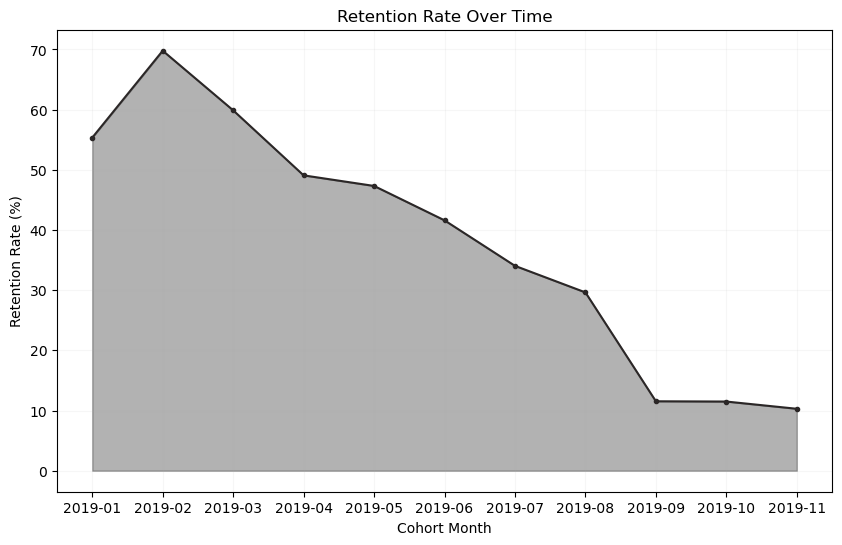

In [572]:
# Plotting the retention rate over time
plt.figure(figsize=(10, 6))

plt.fill_between(cohorts['First_Transaction_Month'].astype(str), cohorts['Retention_Rate'], color='black', alpha=0.3)

plt.plot(cohorts['First_Transaction_Month'].astype(str), cohorts['Retention_Rate'], marker='.', color='#2b2727')

plt.title('Retention Rate Over Time')
plt.xlabel('Cohort Month')
plt.ylabel('Retention Rate (%)')
plt.grid(True, alpha=0.1)
plt.show()

> There seems to be a general decreasing trend in retention rates over time. 
>- Retention rates are relatively high in the earlier months (January, February, March) but decline in the subsequent months 
>- This trend could indicate that customer retention becomes more challenging as time progresses, and it may require additional efforts to maintain customer loyalty over the long term.

## Which Month cohort has maximum retention?

In [547]:
# Finding the cohort with the maximum retention rate
cohorts.loc[cohorts['Retention_Rate'].idxmax()]

First_Transaction_Month      2019-02
New_Customers                     96
Repeat_Customers                  67
Retention_Rate             69.791667
Name: 1, dtype: object

> Feb Month in 2019 saw the maximum retention

---